# Proyecto de Python Equipo 8

>   *   Nicky García Fierros (nickygarcia@ciencias.unam.mx)
>   *   Kevin Martin Rivera Castro (kevinrc.unam@gmail.com)
>   *   Jesús Manuel Jimenez Cardoza (chucho003@hotmail.com)
>   *   Minerva Estefanía Núñez Manjarrez (estefania.nun.man@gmail.com)
>   *   Luis Mateo Patricio Pineda (mateopa@gmail.com)

---

## Librerías necesarias

---

In [1]:
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.linear_model import LinearRegression
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.util import ngrams

# Estimados de Locación y Variabilidad

In [2]:
####   ========== Estimados de Locación y Variabilidad ========== ####

# Leemos el archivo con los datos procesados que se obtuvo del proyecto anterior
raw = pd.read_csv('https://raw.githubusercontent.com/MinervaNunez/Proyecto-_Fase3_Python/rama-mateo/RNPEDFC_Final.csv', encoding='ISO-8859-1')

# Guardamos los datos en formato CSV para leerlos con la librería pandas y crear un DataFrame
raw.to_csv('RNPEDFC.csv', index=False, encoding='ISO-8859-1')
df = pd.read_csv('RNPEDFC.csv', encoding='ISO-8859-1')

Listamos los nombres de las columnas del DataFrame

In [3]:
df.columns

Index(['anio', 'fecha', 'hora', 'dias_desaparecido', 'entidad', 'municipio',
       'localidad', 'coordenadas', 'nacionalidad', 'sexo', 'edad', 'estatura',
       'complexion', 'senas_particulares', 'discapacidad',
       'dependecia_origen'],
      dtype='object')

Mostramos los tipos de datos de las columnas del DataFrame

In [4]:
df.dtypes

anio                    int64
fecha                  object
hora                   object
dias_desaparecido       int64
entidad                object
municipio              object
localidad              object
coordenadas            object
nacionalidad           object
sexo                   object
edad                    int64
estatura              float64
complexion             object
senas_particulares     object
discapacidad           object
dependecia_origen      object
dtype: object

Se observa que las columnas: 
* año, 
* fecha, 
* hora, 
* dias_desaparecido, 
* coordenadas, 
* edad, 
* estatura 

son de tipo numérico, sin embargo pandas reconoce como númericas solo las variables
* año, 
* dias_desaparecido, 
* edad y 
* estatura.

Convertimos la columna 'fecha' a tipo de datos datetime

In [5]:
df['fecha']= pd.to_datetime(df['fecha'])

# Calcular los estimados de locación
*   Promedio
*   Mediana
*   Media Truncada

In [6]:
# Calcular los estimados de locación
# Promedio
# Mediana
# Media Truncada

anios = df['anio']
media = round(anios.mean())
mediana = round(anios.median())
media_truncada = round(stats.trim_mean(anios, 0.05))
print(f'Del valor año: \nEl promedio es {media}, \nLa media truncada un 10% es {media_truncada} y \nLa mediana es {mediana}')

dias_desaparecido = df['dias_desaparecido']
media = round(dias_desaparecido.mean())
mediana = round(df['dias_desaparecido'].median())
media_truncada = round(stats.trim_mean(df['dias_desaparecido'], 0.05))
print(f'\nDel valor Días Desaparecido: \nEl promedio es {media}, \nLa media truncada un 10%  es {media_truncada} y \nLa mediana es {mediana}')

edades = df['edad']
media = round(edades.mean())
mediana = round(edades.median())
media_truncada = round(stats.trim_mean(edades, 0.05))
print(f'\nDel valor Edad: \nEl promedio es {media}, \nLa media truncada un 10%  es {media_truncada} y \nLa mediana es {mediana}')

estaturas = df['estatura']
media = round(estaturas.mean(), 2)
mediana = round(estaturas.median(), 2)
media_truncada = round(stats.trim_mean(estaturas, 0.05), 2)
print(f'\nDel valor Estatura: \nEl promedio es {media}, \nLa media truncada un 10% es {media_truncada} y \nLa mediana es {mediana}')
       

Del valor año: 
El promedio es 2013, 
La media truncada un 10% es 2014 y 
La mediana es 2014

Del valor Días Desaparecido: 
El promedio es 1606, 
La media truncada un 10%  es 1553 y 
La mediana es 1518

Del valor Edad: 
El promedio es 31, 
La media truncada un 10%  es 30 y 
La mediana es 28

Del valor Estatura: 
El promedio es 1.64, 
La media truncada un 10% es 1.65 y 
La mediana es 1.64


# Calcular los estimados de variabilidad

*   Desviación estándar
*   Rango
*   Percentiles 25 y 75
*   Rango intercuartil

In [7]:
# Calcular los estimados de variabilidad
# Desviación estándar
# Rango
# Percentiles 25 y 75 (por lo menos)
# Rango intercuartil

anios = df['anio']
dias_desaparecido = df['dias_desaparecido']
edades = df['edad']
estaturas = df['estatura']

desviacion_estandar = round(anios.std(), 2)
rango = max(anios) - min(anios)
percentil_0 = anios.quantile(0)
percentil_10 = anios.quantile(0.1)
percentil_25 = anios.quantile(0.25)
percentil_50 = anios.quantile(0.5)
percentil_75 = anios.quantile(0.75)
rango_intercuartil = percentil_75 - percentil_25

print(f'\nLa desviación estandar del valor Año es: {desviacion_estandar}')
print(f'El rango del valor Año es: {rango}')
print(f'Percentil 0: {percentil_0}')
print(f'Percentil 10: {percentil_10}')
print(f'Percentil 25: {percentil_25}')
print(f'Percentil 50: {percentil_50}')
print(f'Percentil 75: {percentil_75}')
print(f'El rango intercuartilíco del valor Año es: {rango_intercuartil}')

desviacion_estandar = round(dias_desaparecido.std(), 2)
rango = max(dias_desaparecido) - min(dias_desaparecido)
percentil_0 = dias_desaparecido.quantile(0)
percentil_10 = dias_desaparecido.quantile(0.1)
percentil_25 = dias_desaparecido.quantile(0.25)
percentil_50 = dias_desaparecido.quantile(0.5)
percentil_75 = dias_desaparecido.quantile(0.75)
rango_intercuartil = percentil_75 - percentil_25

print(f'\nLa desviación estandar del valor Días Desaparecido es: {desviacion_estandar}')
print(f'El rango del valor Días Desaparecido es: {rango}')
print(f'Percentil 0: {percentil_0}')
print(f'Percentil 10: {percentil_10}')
print(f'Percentil 25: {percentil_25}')
print(f'Percentil 50: {percentil_50}')
print(f'Percentil 75: {percentil_75}')
print(f'El rango intercuartilíco del valor Días Desaparecido es: {rango_intercuartil}')

desviacion_estandar = round(edades.std(), 2)
rango = max(edades) - min(edades)
percentil_0 = edades.quantile(0)
percentil_10 = edades.quantile(0.1)
percentil_25 = edades.quantile(0.25)
percentil_50 = edades.quantile(0.5)
percentil_75 = edades.quantile(0.75)
rango_intercuartil = percentil_75 - percentil_25

print(f'\nLa desviación estandar del valor Edad es: {desviacion_estandar}')
print(f'El rango del valor Edad es: {rango}')
print(f'Percentil 0: {percentil_0}')
print(f'Percentil 10: {percentil_10}')
print(f'Percentil 25: {percentil_25}')
print(f'Percentil 50: {percentil_50}')
print(f'Percentil 75: {percentil_75}')
print(f'El rango intercuartilíco del valor Edad es: {rango_intercuartil}')

desviacion_estandar = round(estaturas.std(), 2)
rango = max(estaturas) - min(estaturas)
percentil_0 = estaturas.quantile(0)
percentil_10 = estaturas.quantile(0.1)
percentil_25 = estaturas.quantile(0.25)
percentil_50 = estaturas.quantile(0.5)
percentil_75 = estaturas.quantile(0.75)
rango_intercuartil = percentil_75 - percentil_25

print(f'\nLa desviación estandar del valor Estatura es: {desviacion_estandar}')
print(f'El rango del valor Estatura es: {rango}')
print(f'Percentil 0: {percentil_0}')
print(f'Percentil 10: {percentil_10}')
print(f'Percentil 25: {percentil_25}')
print(f'Percentil 50: {percentil_50}')
print(f'Percentil 75: {percentil_75}')
print(f'El rango intercuartilíco del valor Estatura es: {rango_intercuartil}')



La desviación estandar del valor Año es: 3.08
El rango del valor Año es: 50
Percentil 0: 1968.0
Percentil 10: 2010.0
Percentil 25: 2011.0
Percentil 50: 2014.0
Percentil 75: 2016.0
El rango intercuartilíco del valor Año es: 5.0

La desviación estandar del valor Días Desaparecido es: 1123.03
El rango del valor Días Desaparecido es: 18165
Percentil 0: 1.0
Percentil 10: 257.0
Percentil 25: 647.0
Percentil 50: 1518.0
Percentil 75: 2455.0
El rango intercuartilíco del valor Días Desaparecido es: 1808.0

La desviación estandar del valor Edad es: 14.37
El rango del valor Edad es: 102
Percentil 0: 1.0
Percentil 10: 15.0
Percentil 25: 21.0
Percentil 50: 28.0
Percentil 75: 38.0
El rango intercuartilíco del valor Edad es: 17.0

La desviación estandar del valor Estatura es: 0.14
El rango del valor Estatura es: 1.74
Percentil 0: 0.3
Percentil 10: 1.55
Percentil 25: 1.62
Percentil 50: 1.64
Percentil 75: 1.7
El rango intercuartilíco del valor Estatura es: 0.07999999999999985


# Distribuciones muestrales y técnicas de evaluación de modelos

Separamos nuestras variables categóricas y nuestras variables numéricas del dataset, para poder describir las variables numéricas más representantes de las personas desaparecidas en México.

In [8]:
col_categoricas=["entidad", "municipio", "localidad", "nacionalidad", "sexo", "complexion"]
col_numericas=["dias_desaparecido", "edad", "estatura"]
desaparecido=["dias_desaperecido"]
df[col_numericas].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dias_desaparecido,35901.0,1605.552269,1123.028395,1.0,647.00,1518.00,2455.0,18166.00
edad,35901.0,30.549929,14.370017,1.0,21.00,28.00,38.0,103.00
estatura,35901.0,1.639094,0.136044,0.3,1.62,1.64,1.7,2.04


Con la descripción anterior se puede observa que el promedio de tiempo de las personas desaparecidas es de 4 años, la edad es de adultos jóvenes con 30 años de edad y una estatura de 1.63 metros.

**¿En Mexico desaparecen mas o hombres o mujeres?**

Con respecto al aunmento de la violencia de género en la actualidad, se muestra que en el rango de tiempo del Dataset que comprende de 1968 a 2018 los sujetos masculinos son quienes desaparecieron mas 

<AxesSubplot: ylabel='sexo'>

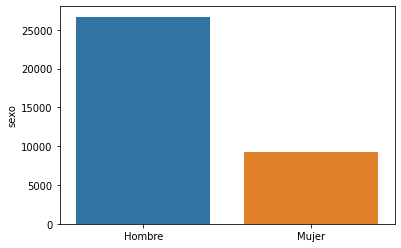

In [9]:
counts=df["sexo"].value_counts()
sns.barplot(x=counts.index, y=counts)

**¿Que tipo de complexión tienen las personas desaparecidas?**



Otro dato estadistico que resultó interesante con respecto a que  México es un pais de obesos, es que la mayoria de las personas desaparecidas tienen una complexión delgada  

<AxesSubplot: ylabel='complexion'>

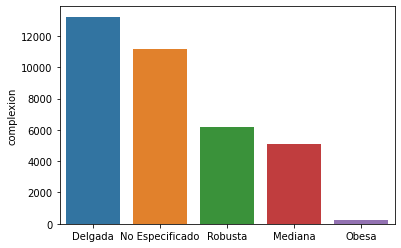

In [10]:
counts2=df["complexion"].value_counts()
sns.barplot(x=counts2.index, y=counts2)

**La estatura promedio del mexicano**

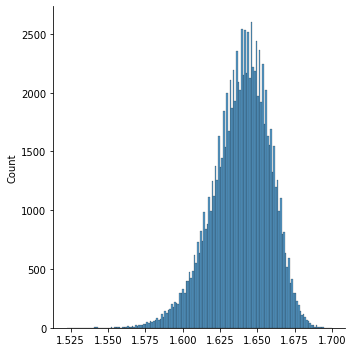

In [11]:
altura = df['estatura']

medias = []

for i in range(100_000):
    sample = altura.sample(n=50, replace=True)
    medias.append(sample.mean())
    
media_alturas = pd.Series(medias)

sns.displot(media_alturas);

In [12]:
Kurtosis= {round(media_alturas.kurtosis(),95)}
Kurtosis

{0.45965891763057115}

Efectivamente lo anterior nos demuestra que "la estatura promedio" del mexicano comprende alrededor de 1.65 m una curtosis positiva de 0.44.

**El error estandar de nuesto campo de estatura**

In [13]:
print(f'Error estandar: {media_alturas.std()}')

Error estandar: 0.01921012587202749


In [14]:
print(f'Valor mínimo: {media_alturas.min()}')
print(f'Valor máximo: {media_alturas.max()}')
print(f'Rango: {media_alturas.max() - media_alturas.min()}')

Valor mínimo: 1.5223999999999998
Valor máximo: 1.7
Rango: 0.1776000000000002


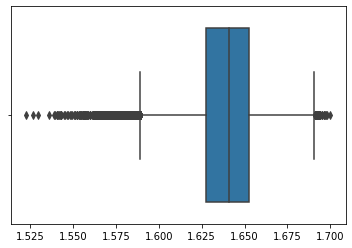

In [15]:
sns.boxplot(x=media_alturas);

**Intervalo de confianza**

Utilizando un intervalo de confianza de 95 %

In [16]:
limite_inferior = media_alturas.quantile(0.025)
limite_superior = media_alturas.quantile(0.975)

In [17]:
mean_of_intervals = ((altura.mean() - limite_inferior) + (limite_superior - altura.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {altura.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 1.6390941756494992 +/- 0.03750000000000031


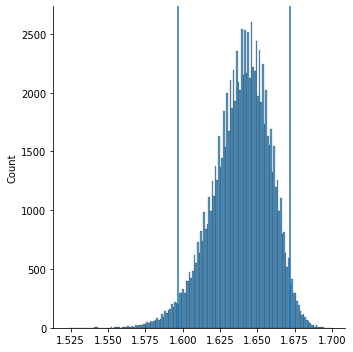

In [18]:
sns.displot(media_alturas, kde=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);




Con esto se comprobó que la mayoria de las estaturas de las personas desaparecidas si cae en en este nuevo intervalo



---

# Lectura de datos

---



Realizamos la lectura de los datos a partir del archivo .csv obtenido en el módulo anterior.



In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/MinervaNunez/Proyecto-_Fase3_Python/main/RNPEDFC_Final.csv',encoding='ISO-8859-1')

El `DataFrame` resultante se muestra a continuación.

In [20]:
df

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.10,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,Mujer,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.10,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.10,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,Hombre,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,2018,2018-04-26,08:00:00,4,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Hombre,22,1.60,Delgada,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35897,2018,2018-01-08,11:00:00,112,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Mujer,27,1.70,Robusta,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima
35898,2015,2015-02-02,07:00:00,1183,Puebla,Chila,Chilas De Las Flores,"17.965896, -97.864616",Mexicana,Mujer,86,1.77,Mediana,No Especificado,Ninguno,FGE - Puebla
35899,2017,2017-08-22,04:00:00,251,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Hombre,41,1.76,Robusta,Tatuaje En El Brazo Izquierdo Con La Imagen De...,Ninguno,PGJ - Colima




---

# Distribuciones

---



El `DataFrame` tiene el siguiente tipo de variables:



In [21]:
df.dtypes

anio                    int64
fecha                  object
hora                   object
dias_desaparecido       int64
entidad                object
municipio              object
localidad              object
coordenadas            object
nacionalidad           object
sexo                   object
edad                    int64
estatura              float64
complexion             object
senas_particulares     object
discapacidad           object
dependecia_origen      object
dtype: object



> Gracias a `dtypes` podemos ver que hay tres variables de tipo `int64` y una variable de tipo `float64`.



#Boxplot


Hay cuatro variables numéricas en nuestro dataset: año, días de desaparecido, edad, y estatura. Podemos ver la distribución de cada una mediante un boxplot.


<AxesSubplot: xlabel='anio'>

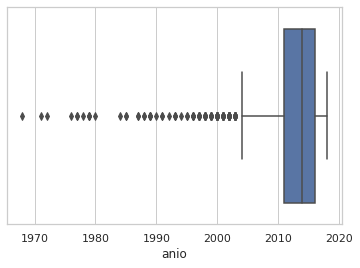

In [22]:
sns.set(style="whitegrid")
sns.boxplot(x=df['anio'])



> Podemos ver que la mayor parte de los casos de personas desaparecidas se han dado en los años más recientes dado que la distribución tiende a los malores más altos del conjunto de datos. También se puede ver que los datos atípicos se extienden a la izquierda de la gráfica.



<AxesSubplot: xlabel='dias_desaparecido'>

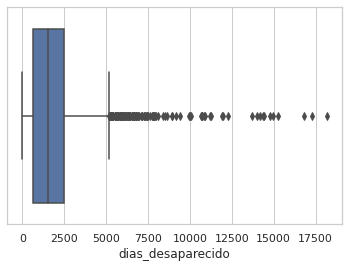

In [23]:
sns.set(style="whitegrid")
sns.boxplot(x=df['dias_desaparecido'])



> La distribución de los días que lleva la víctima desaparecida tiende a los valores pequeños del conjunto de datos. Los valores atípicos se extienden a la derecha del gráfico.



<AxesSubplot: xlabel='edad'>

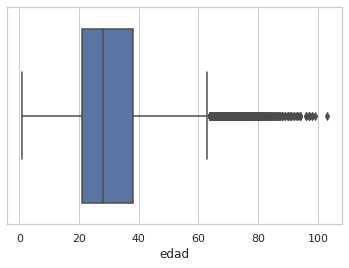

In [24]:
sns.set(style="whitegrid")
sns.boxplot(x=df['edad'])



> El 50% de los datos acerca de la edad registrada en el set de datos pertenece al rango de 20-40 años aproximadamente, teniendo una distribución que tiende a los valores pequeños del conjunto de datos. La distribución que se muestra para esta variable es más dispersa que las mostradas anteriormente.



<AxesSubplot: xlabel='estatura'>

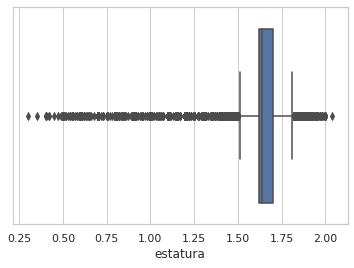

In [25]:
sns.set(style="whitegrid")
sns.boxplot(x=df['estatura'])



> La estatura es la variable que tiene más valores atípicos comparada con las anteriores. Tiene valores atípicos en ambos extremos de la cola. Los datos se concentran en los valores más altos del conjunto de datos.



A pesar de que nuestras variables numéricas tienen "valores atípicos", no serán filtrados del conjunto de datos. Los datos que están fuera del boxplot son casos registrados oficialmente como personas desaparecidas, por lo que bajo el contexto del set de datos sabemos que no son errores o valores anormales. 

#Tabla de Frecuencias

Para obtener más información de nuestras variables numéricas podemos desarrollar otro tipo de visualizaciones. La variable de año puede darnos más información acerca de los casos de personas desaparecidas en cierto rango de tiempo mediante una tabla de frecuencias.

Empezamos obteniendo el rango de nuestro conjunto de datos.


In [26]:
anios = df['anio']
anios.max() - anios.min()

50



> Dado que nuestro rango es muy pequeño, decidimos dividir en 10 segmentos.



Usando `cut` podemos segmentar nuestros datos.

In [27]:
pd.cut(anios, 10)

0        (2008.0, 2013.0]
1        (2003.0, 2008.0]
2        (2008.0, 2013.0]
3        (2003.0, 2008.0]
4        (2003.0, 2008.0]
               ...       
35896    (2013.0, 2018.0]
35897    (2013.0, 2018.0]
35898    (2013.0, 2018.0]
35899    (2013.0, 2018.0]
35900    (2013.0, 2018.0]
Name: anio, Length: 35901, dtype: category
Categories (10, interval[float64, right]): [(1967.95, 1973.0] < (1973.0, 1978.0] < (1978.0, 1983.0] < (1983.0, 1988.0] ... (1998.0, 2003.0] < (2003.0, 2008.0] < (2008.0, 2013.0] < (2013.0, 2018.0]]

La serie resultante la podemos agrupar y hacer el conteo de frecuencias.

In [28]:
segmentos = pd.cut(anios, 10)

df['anio'].groupby(segmentos).count()

anio
(1967.95, 1973.0]        3
(1973.0, 1978.0]         4
(1978.0, 1983.0]         4
(1983.0, 1988.0]         7
(1988.0, 1993.0]        11
(1993.0, 1998.0]        25
(1998.0, 2003.0]        73
(2003.0, 2008.0]      1568
(2008.0, 2013.0]     15567
(2013.0, 2018.0]     18639
Name: anio, dtype: int64



> Los casos de personas desaparecidas se concentran en los últimos 10 años de la lista (2008-2018), teniendo 15,567 casos del 2008-2013 y 18,639 casos del 2013-2018.



#Histograma

Las tres variables numéricas restantes pueden visualizarse en un histograma para obtener información más detallada de su distribución. Usando `Seaborn` podemos obtener el histograma de los días que lleva el caso abierto. 

/tmp/ipykernel_59456/228251844.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dias_desaparecido'], kde=False, norm_hist=False, bins=40)


<AxesSubplot: xlabel='dias_desaparecido'>

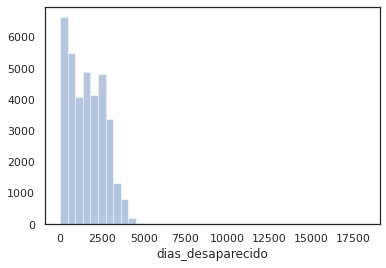

In [29]:
sns.set(style='white')
sns.distplot(df['dias_desaparecido'], kde=False, norm_hist=False, bins=40)



> Usando un binning de 40 para acentuar más la forma del histograma podemos ver que los datos tienen una asimetría positiva dado que la cola derecha es más larga que la izquierda. Dada la forma de los datos, es difícil inferir si es una distribución de cola corta o cola larga.



In [30]:
dias_des_valores=df.dias_desaparecido.values
print("kurtosis",kurtosis(dias_des_valores))
print("asimetria",skew(dias_des_valores))

kurtosis 9.10798077972732
asimetria 1.2970145907278083




> La asimetría de los datos `dias_desaparecido` es mayor a 0 y positiva, lo cual confirma la asimetría positiva que vimos en el histograma. La curtosis es positiva y mayor a cero, lo cual indica que la distribución está achatada y dispersa alrededor del punto medio. La distribución es de cola larga.



El histograma de la edad de las víctimas se muestra a continuación.

/tmp/ipykernel_59456/3506485635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['edad'], kde=False, norm_hist=False, bins=20)


<AxesSubplot: xlabel='edad'>

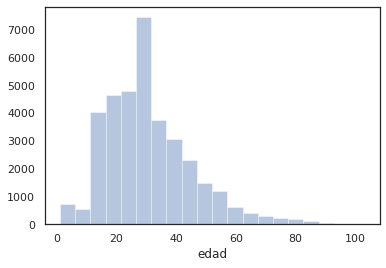

In [31]:
sns.distplot(df['edad'], kde=False, norm_hist=False, bins=20)



> Podemos ver que los datos tienen una ligera asimetría positiva dado que la cola derecha es más larga que la izquierda. De igual forma se puede ver que la distribución es de cola larga.



In [32]:
edades_valores=df.edad.values
print("kurtosis",kurtosis(edades_valores))
print("asimetria",skew(edades_valores))

kurtosis 1.5296287761320748
asimetria 1.0113409801553876




> La asimetría de los datos `edad` es mayor a 0 y positiva, lo cual confirma la asimetría positiva que vimos en el histograma. La curtosis es positiva y mayor a cero, lo cual confirma la distribución de cola larga vista en el histograma. Ambos valores son ligeramente mayores a 0, por lo que esta distribución se acerca a la normal más que la anterior.



Finalmente, el histograma de la estatura de las víctimas se muestra a continuación.

/tmp/ipykernel_59456/106397111.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['estatura'], kde=False, norm_hist=False, bins=30)


<AxesSubplot: xlabel='estatura'>

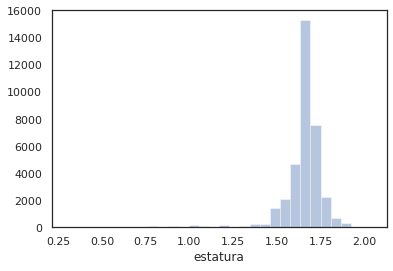

In [33]:
sns.distplot(df['estatura'], kde=False, norm_hist=False, bins=30)



> Podemos ver que los datos tienen una asimetría negativa dado que la cola izquierda es más larga que la derecha. De igual forma se puede ver que la distribución es de cola larga.



In [34]:
estatura_valores=df.estatura.values
print("kurtosis",kurtosis(estatura_valores))
print("asimetria",skew(estatura_valores))

kurtosis 21.791569364122182
asimetria -3.605588838799281




> La asimetría de los datos `estatura` es mayor a 0 y negativa, lo cual confirma la asimetría negativa que vimos en el histograma. La curtosis es positiva y mayor a cero, lo cual confirma la distribución de cola larga vista en el histograma.



#Gráfica de densidad

Para comparar distribuciónes en una misma gráfica, podemos hacer uso de los gráficos de densidad. Estos nos permiten graficar variables numéricas respecto de una variable categórico. Usando los datos de edad, estatura y sexo, podemos comparar las distribuciones de la edad y estaura según los datos de hombres y mujeres.

<AxesSubplot: xlabel='edad', ylabel='Density'>

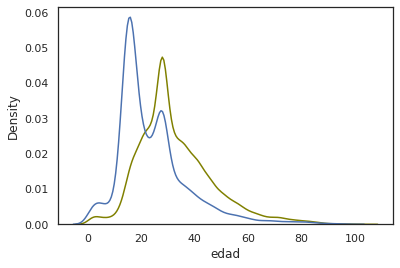

In [35]:
sns.kdeplot(data = df.query("sexo == 'Hombre'"), x = 'edad', color = 'olive')
sns.kdeplot(data = df.query("sexo == 'Mujer'"), x = 'edad')



> La línea color verde muestra la distribución de la edad para los hombres. Muestra un mayor conteo de casos en las edades de 20-40 años. La línea azul muestra la distribución de la edad para las mujeres. Sorprendentemente, la distribución actúa de manera casi bimodal, teniendo dos puntos altos antes y después de los 20 años.






El gráfico de densidad para la estatura de hombre sy mujeres se muestra a continuación.

<AxesSubplot: xlabel='estatura', ylabel='Density'>

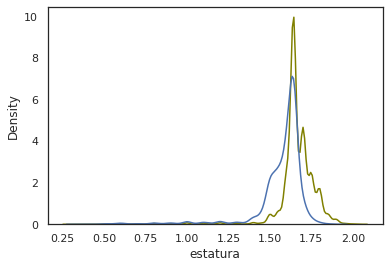

In [36]:
sns.kdeplot(data = df.query("sexo == 'Hombre'"), x = 'estatura', color = 'olive')
sns.kdeplot(data = df.query("sexo == 'Mujer'"), x = 'estatura')



> La línea verde muestra los datos de estatura para los hombres. Se puede ver que los datos se concentran alrededor del 1.60 m de estatura, teniendo otro pico a los 1.70 m. La línea azul muestra los datos de estatura para las mujeres, teniendo los datos concentrados alrededor de 1.60 m. 



# Scatterplot

Como parte de la visualización avanzada, podemos hacer uso del scatterplot para visualizar la relación entre dos variables numéricas segmentadas por una variable categórica. Usando la edad y estatura como variables numéricas, y el sexo como variable categórica, el resultado es el siguiente:

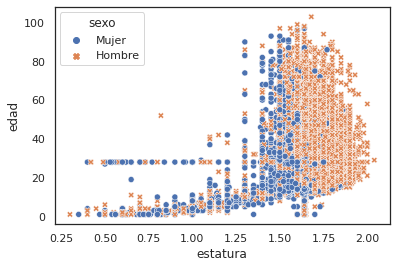

In [37]:
sns.scatterplot(x=df['estatura'], y=df['edad'], hue=df['sexo'],style=df['sexo']);



> Los datos mostrados se concentran más en las estaturas más altas tanto para hombres como para mujeres. No obstante, no parece muy evidente la concentración de datos en las edades.



# Binning Hexagonal

Dado que es un poco difícil de visualizar la relación entre edad y estatura con el scatterplot por la densidad de los puntos, podemos usar un binnning hexagonal para tener más información al respecto.

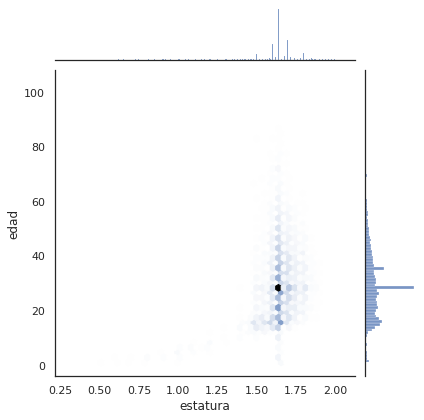

In [39]:
sns.jointplot(x='estatura', y='edad', data=df, kind='hex', ratio=5, joint_kws={'gridsize': 50});



> El binning hexagonal confirma las primeras características que vimos con el scatterplot. La estatura más común en los datos está alrededor del 1.60 m, no obstante también nos dice que la edad más común está alrededor de los 25 años. 



# Identificación de variables categóricas

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/KevinRC55/Proyecto-de-Python-BEDU/main/RNPEDFC_Final.csv', encoding='ISO-8859-1')
df.head()

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.1,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,Mujer,4,1.1,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.1,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.1,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,Hombre,4,1.1,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico


En el proyecto anterior ya habíamos identificado las variables categóricas de nuestro dataset, las cuales fueron las siguientes:
| Variable | Tipo |
| -------  | ---- |
| Pais en que se le vio por ultima vez         | Categórico (`MEXICO`) |
| Entidad en que se le vio por ultima vez      | Categórico (valores de `entidad`) |
| Municipio en que se le vio por ultima vez    | Categórica (valores de `municipio`) |
| Localidad en que se le vio por ultima vez    | Categórica (valores de `localidad`) |
| Nacionalidad                                 | Categórica (valores de `nacionalidad`) |
| Complexion                                   | Categórica (`Delgada`, `Mediana`, `NO ESPECIFICADA`, `Obesa`, `Robusta`) |
| Sexo                                         | Categórica (`Hombre`, `Mujer`) |
| Estatura                                     | Numérico float64 (valores en metros) |
| Edad                                         | Numérico int64 (`1` a `103`) |
| Etnia                                        | Categórica (valores de  `etnia`)|
| Discapacidad                                 | Categórica (`Autismo`, `Ninguno`, `NO ESPECIFICADO`, `Sindrome de Down`) |
| Dependencia que envio la informacion         | Categórica (valores de `dependencia_origen`) |

Obtenemos el conteo de frecuencias para cada variable categórica.

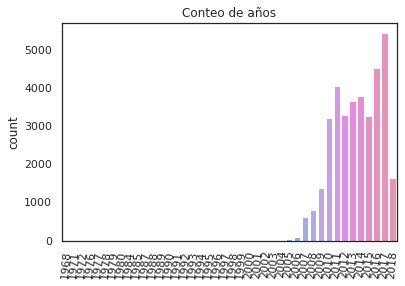

In [41]:
counts = df['anio'].value_counts()
ax = sns.barplot(x=counts.index, y=counts)
ax.set_title(f'Conteo de años')
ax.set(ylabel='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85);

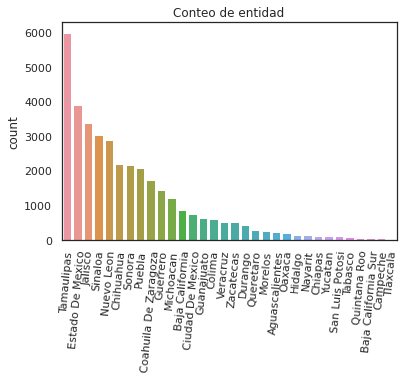

In [42]:
counts = df['entidad'].value_counts()
ax = sns.barplot(x=counts.index, y=counts)
ax.set_title(f'Conteo de entidad')
ax.set(ylabel='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85);

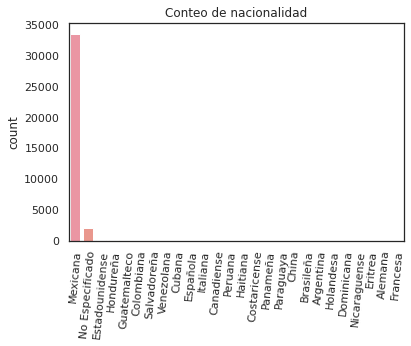

In [43]:
counts = df['nacionalidad'].value_counts()
ax = sns.barplot(x=counts.index, y=counts)
ax.set_title(f'Conteo de nacionalidad')
ax.set(ylabel='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85);

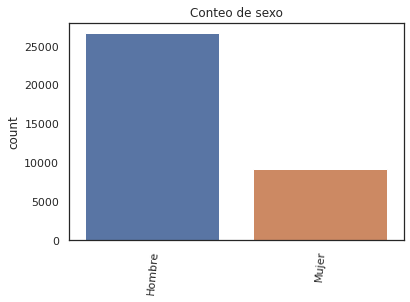

In [44]:
counts = df['sexo'].value_counts()
ax = sns.barplot(x=counts.index, y=counts)
ax.set_title(f'Conteo de sexo')
ax.set(ylabel='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85);

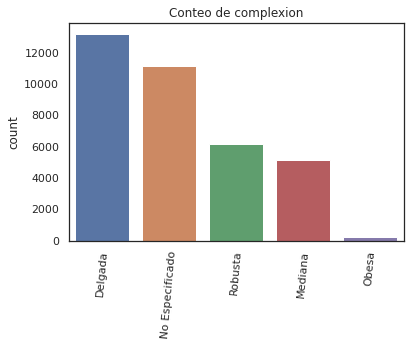

In [45]:
counts = df['complexion'].value_counts()
ax = sns.barplot(x=counts.index, y=counts)
ax.set_title(f'Conteo de complexion')
ax.set(ylabel='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85);

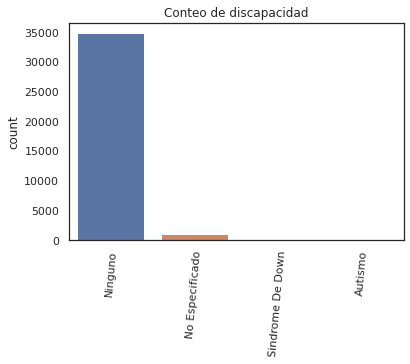

In [46]:
counts = df['discapacidad'].value_counts()
ax = sns.barplot(x=counts.index, y=counts)
ax.set_title(f'Conteo de discapacidad')
ax.set(ylabel='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85);

Graficamos el resto de variables:

In [47]:
pd.crosstab(df['sexo'], df['complexion'])

complexion,Delgada,Mediana,No Especificado,Obesa,Robusta
sexo,,,,,
Hombre,9685,3683,8411,186,4710
Mujer,3540,1443,2739,48,1456


In [48]:
pd.crosstab(df['complexion'], df['entidad'])

entidad,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad De Mexico,Coahuila De Zaragoza,Colima,Durango,...,Quintana Roo,San Luis Potosi,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatan,Zacatecas
complexion,,,,,,,,,,,,,,,,,,,,,
Delgada,78,376,20,19,57,939,318,532,345,138,...,30,15,991,825,20,1792,13,189,48,208
Mediana,16,118,11,1,19,327,121,275,35,59,...,11,7,461,276,6,666,5,98,24,100
No Especificado,97,259,2,7,0,573,188,479,37,122,...,9,59,1430,785,31,2172,0,72,2,103
Obesa,3,5,0,0,0,5,1,16,1,1,...,0,1,15,20,0,58,0,7,2,4
Robusta,28,107,6,7,32,337,99,412,174,95,...,11,14,126,244,10,1299,6,154,23,95


In [49]:
pd.crosstab(df['edad'], df['complexion'])

complexion,Delgada,Mediana,No Especificado,Obesa,Robusta
edad,,,,,
1,36,30,57,0,29
2,52,21,27,0,21
3,62,31,30,0,15
4,66,19,20,0,10
5,70,13,17,1,9
...,...,...,...,...,...
96,0,1,0,0,1
97,2,0,2,0,0
98,0,0,2,0,0


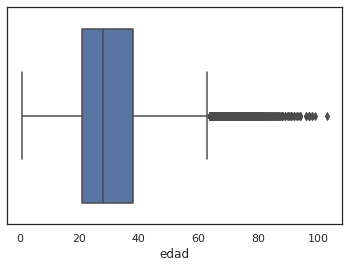

In [50]:
sns.boxplot(x=df['edad']);

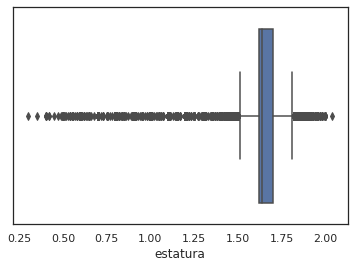

In [51]:
sns.boxplot(x=df['estatura']);

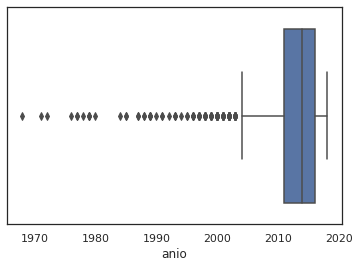

In [52]:
sns.boxplot(x=df['anio']);

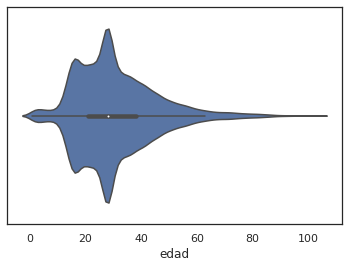

In [53]:
sns.violinplot(x=df['edad']);

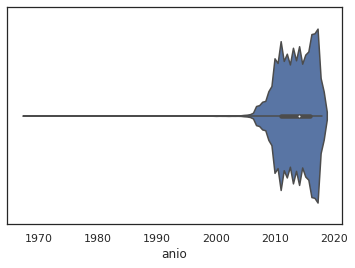

In [54]:
sns.violinplot(x=df['anio']);

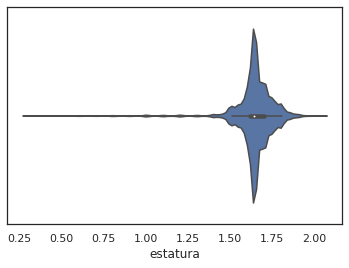

In [55]:
sns.violinplot(x=df['estatura']);

##  Análisis bivariado y Regresión Lineal Simple

### Variables númericas

Usamos `dtypes` para ver el tipo de variables con las que contamos.

In [56]:
df.dtypes

anio                    int64
fecha                  object
hora                   object
dias_desaparecido       int64
entidad                object
municipio              object
localidad              object
coordenadas            object
nacionalidad           object
sexo                   object
edad                    int64
estatura              float64
complexion             object
senas_particulares     object
discapacidad           object
dependecia_origen      object
dtype: object

Creamos una lsita con el nombre de nuestras variables númericas.

In [57]:
numericas = df.select_dtypes( include=['int64','float64'] ).columns.tolist()
numericas

['anio', 'dias_desaparecido', 'edad', 'estatura']

Visualizamos nuestras variables númericas.

In [58]:
df[numericas]

,anio,dias_desaparecido,edad,estatura
0,2012,2234,7,1.10
1,2007,4102,4,1.10
2,2009,3334,6,1.10
3,2006,4146,10,1.10
4,2008,3762,4,1.10
...,...,...,...,...
35896,2018,4,22,1.60
35897,2018,112,27,1.70
35898,2015,1183,86,1.77
35899,2017,251,41,1.76


In [59]:
df[numericas].sample(10)

,anio,dias_desaparecido,edad,estatura
4182,2011,2596,29,1.68
3957,2008,3620,36,1.75
2991,2012,2079,13,1.70
30674,2011,2494,34,1.70
559,2010,2907,37,1.64
33013,2017,338,15,1.78
21075,2015,1012,20,1.70
15661,2014,1546,25,1.81
22063,2015,920,1,1.60
14489,2013,1731,44,1.56


> Tenemos cuatro variables númericas ```anio```, ```dias_desaparecido```, ```edad``` y ```estatura```.

### Correlación

Generamos una matriz de correlaciones para visualizar las relaciones entre nuestras variables.

In [60]:
df[numericas].corr()

,anio,dias_desaparecido,edad,estatura
anio,1.000000,-0.995779,-0.101131,-0.105262
dias_desaparecido,-0.995779,1.000000,0.100607,0.106969
edad,-0.101131,0.100607,1.000000,0.257746
estatura,-0.105262,0.106969,0.257746,1.000000


Usamos un mapa de calor papa visualizar la correlación de mejor manera.

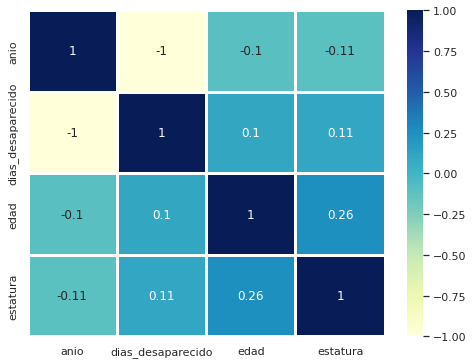

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numericas].corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=3);

> Podemos observar un alto coeficiente de correlación negativa entre el año de desaparición y los días desaparecido, esto es lógico, ya que el cálculo de los días desaparecidos se realiza a partir del año de desaparición.
También observamos una relación positiva, aunque no tan fuerte, entre la edad y la estatura.

### Gráficas de dispersión y valores atípicos

Generamos gráficas de dispersión para visualizar la relación entre pares de variables.

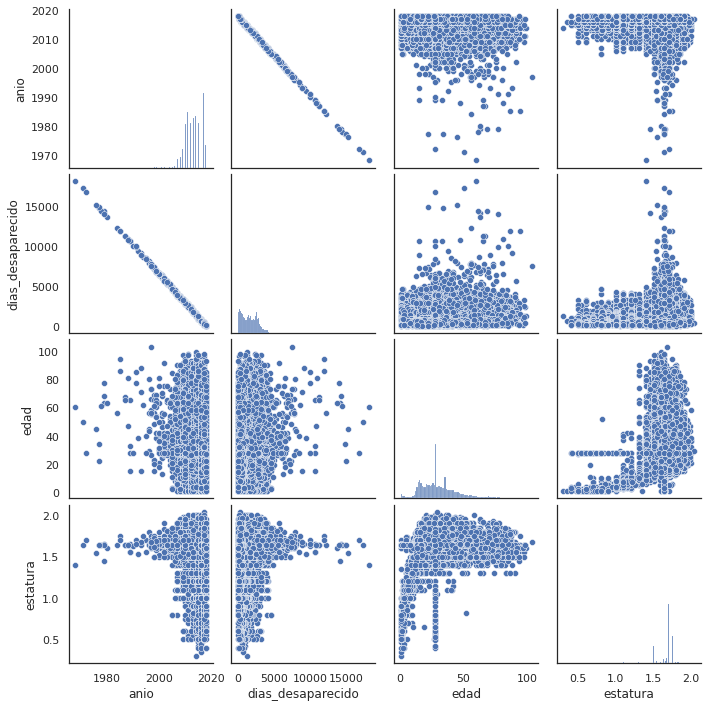

In [62]:
sns.pairplot(df[numericas])

Visualicemos de forma detallada las correlaciones que identificamos en nuestra matriz de correlaciones.

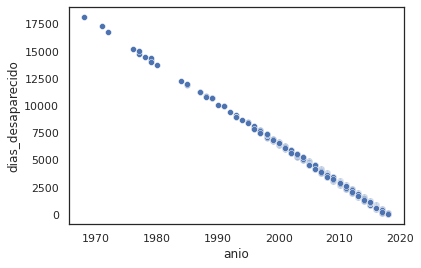

In [64]:
sns.scatterplot(x=df['anio'], y=df['dias_desaparecido']);

<AxesSubplot: xlabel='edad', ylabel='estatura'>

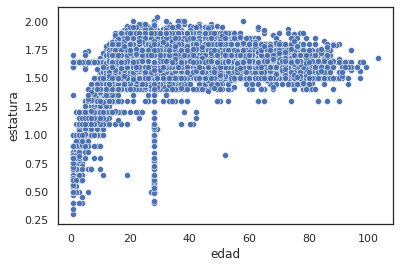

In [65]:
sns.scatterplot(x=df['edad'], y=df['estatura'])

> Podemos ver de forma clara la línea recta que se forma entre el año de desaparición y los días desaparecido. En cuanto a las variables de edad y estatura, no es clara una recta entre los valores.

Observaremos si existen valores atípicos en estatura y edad, y si el eliminarlos mejora la relación entre estas variables.

#### Edad

Generamos un boxplot para identificar los valores atípicos en edad.

<AxesSubplot: >

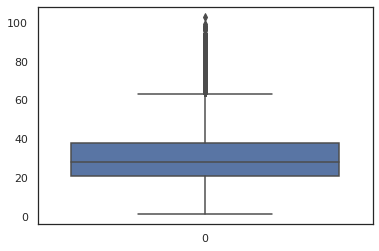

In [66]:
sns.boxplot(df['edad'])

Eliminamos estos valores para recalcular el coeficiente de correlación.

In [67]:
iqr_edad = df['edad'].quantile(0.75) - df['edad'].quantile(0.25)
filter_upper_outliers = df['edad'] < (df['edad'].quantile(0.75) + iqr_edad * 1.5)
df_edad_no_outliers = df[filter_upper_outliers]

<AxesSubplot: xlabel='edad', ylabel='estatura'>

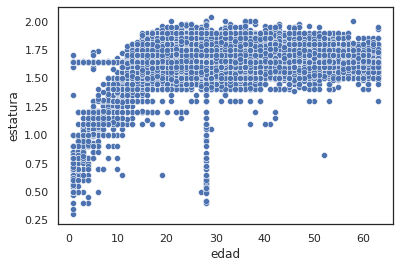

In [69]:
sns.scatterplot(x=df_edad_no_outliers['edad'], y=df_edad_no_outliers['estatura'])

In [70]:
df_edad_no_outliers['edad'].corr(df_edad_no_outliers['estatura'])

0.31901040815807036

> Nuestro coeficiente de correlación mejoro, sin embargo, sigue sin ser clara la relación en la gráfica de dispersión.

#### Estatura

Generamos un boxplot para identificar los valores atípicos en estatura.

<AxesSubplot: >

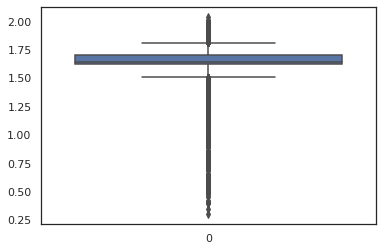

In [71]:
sns.boxplot(df['estatura'])

Eliminamos estos valores para recalcular el coeficiente de correlación.

In [72]:
iqr_estatura = df['estatura'].quantile(0.75) - df['estatura'].quantile(0.25)
filter_outliers = (df['estatura'] > (df['estatura'].quantile(0.25) - iqr_estatura * 1.5)) & (df['estatura'] < (df['estatura'].quantile(0.75) + iqr_estatura * 1.5))
df_estatura_no_outliers = df[filter_outliers]

<AxesSubplot: xlabel='edad', ylabel='estatura'>

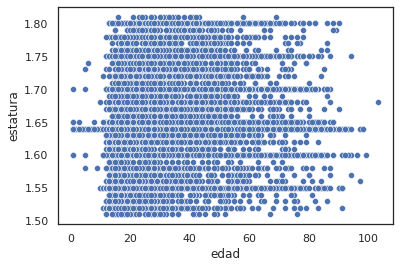

In [74]:
sns.scatterplot(x=df_estatura_no_outliers['edad'], y=df_estatura_no_outliers['estatura'])

In [75]:
df_estatura_no_outliers['edad'].corr(df_estatura_no_outliers['estatura'])

0.08665368625720603

> Nuestro coeficiente de correlación disminulló bastante.

Probemos eliminar únicamente los outliers superiores en ```estatura``` a partir del DataFrame sin ouliers en ``edad``.

In [76]:
iqr_estatura = df_edad_no_outliers['estatura'].quantile(0.75) - df_edad_no_outliers['estatura'].quantile(0.25)
filter_outliers = (df_edad_no_outliers['estatura'] < (df_edad_no_outliers['estatura'].quantile(0.75) + iqr_estatura * 1.5))
df_edad_estatura_no_outliers = df_edad_no_outliers[filter_outliers]

<AxesSubplot: xlabel='edad', ylabel='estatura'>

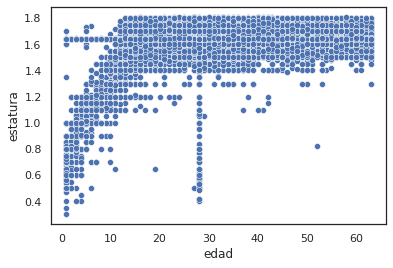

In [78]:
sns.scatterplot(x=df_edad_estatura_no_outliers['edad'], y=df_edad_estatura_no_outliers['estatura'])

In [79]:
df_edad_estatura_no_outliers['edad'].corr(df_edad_estatura_no_outliers['estatura'])

0.3225168656487712

In [80]:
100 - ((df_edad_estatura_no_outliers.shape[0]*100) / df.shape[0])

6.105679507534603

> Nuestro coeficiente de correlación mejoró un poco y únicamente eliminamos un 6% de nuestros registros.

### Modelo de Regresión Lineal

Al ver el comportamiento de la relación de nuestras variables numéricas identificamos dos relaciones, anio-dias_desaparecido y edad-estatura. En la primera relación tenemos un cálculo directo entre una y otra variable, en nuestra segunda relación, aunque no obtuvimos un coeficiente de correlación tan alto, nos podría interesar predecir la estatura de una persona, ya que posiblemente este sea el dato que se desconoce con mayor frecuencia al realizar un reporte de desaparición.

Considerando lo anterior, utilizaremos un modelo de regresión lineal simple para predecir la altura de una persona a partir de la edad.

Usamos el `DataFrame` resultante de la eliminación de outliers en edad y estatura.

In [81]:
df_regresion = df_edad_estatura_no_outliers
df_regresion

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.10,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,Mujer,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.10,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.10,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,Hombre,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35895,2018,2018-04-15,06:30:00,15,Colima,Colima,Colima,"19.242918, -103.709341",Mexicana,Hombre,57,1.59,Robusta,Tiene Una Cicatriz En La Parte Baja De Su Abdo...,Ninguno,PGJ - Colima
35896,2018,2018-04-26,08:00:00,4,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Hombre,22,1.60,Delgada,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35897,2018,2018-01-08,11:00:00,112,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Mujer,27,1.70,Robusta,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima
35899,2017,2017-08-22,04:00:00,251,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Hombre,41,1.76,Robusta,Tatuaje En El Brazo Izquierdo Con La Imagen De...,Ninguno,PGJ - Colima


Definimos nuestro modelo de regresión lineal y realizamos el entrenamiento.

In [82]:
lr = LinearRegression()

lr.fit(df_regresion['edad'].to_frame(), df_regresion['estatura'])

LinearRegression()

Usando nuestro modelo entrenado, usamos de nuevo nuestra variable `edad` para intentar predecir `estatura`.

In [83]:
y_predict = lr.predict(df_regresion['edad'].to_frame())

Graficamos nuestras estaturas originales y las estaturas predecidas.

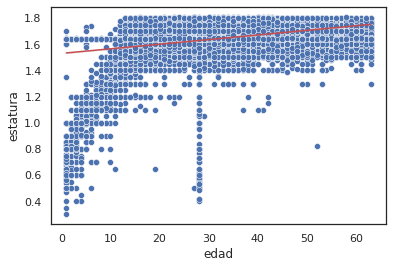

In [85]:
sns.scatterplot(x=df_regresion['edad'], y=df_regresion['estatura']);
sns.lineplot(x=df_regresion['edad'], y=y_predict, color='r');

Obtenemos el coeficiente de determinación de nuestro modelo entrenado.

In [86]:
print(f"R2: {lr.score(df_regresion['edad'].to_frame(), df_regresion['estatura'])}")

R2: 0.10401712862790868


> Nuestro modelo no es muy bueno, muestra variable `edad` explica el 10.4% de la variabilidad de nuestra variable `estatura`. Aun podemos mejorar este modelo considerando alguna otra variable de nuestro `DataFrame` pero esta es solo una primera aproximación a un modelo completo de Machine Learning.

# Mapa

Ya que nuestro `DataFrame` contiene datos de las coordenadas en donde se vio por última vez a la persona, podemos desarrollar un mapa que señale la densidad de los casos a lo largo de la República Mexicana. Primero debemos obtener las coordenadas de latitud y longitud por separado.

In [87]:
df_coordenadas= df['coordenadas'].str.split(', ',expand=True)
df_coordenadas= df_coordenadas.rename(columns = {1:'longitud'})
df_coordenadas= df_coordenadas.rename(columns = {0:'latitud'})
df_coordenadas

,latitud,longitud
0,27.069053,-109.439423
1,19.16368,-100.134684
2,19.266337,-98.8978
3,19.547512,-99.193851
4,18.078,-91.6552
...,...,...
35896,19.051201,-98.212116
35897,19.25,-103.73333
35898,17.965896,-97.864616
35899,19.25,-103.73333




> Usando `str.split` en la columna de coordenadas, podemos separar los datos señalando la coma como el separador. Esto lo guardamos en un nuevo `DataFrame`.



Al obtener las coordenadas en diferentes columnas, debemos señalar que los datos contenidos son variables numéricas.

In [88]:
df_coordenadas= df_coordenadas[['longitud','latitud']].astype(float)


Ya que los datos son identificados de tipo `float`, podemos quitar aquellos datos que tengan una latitud y longitud de 0, dado que son valores que no poseen ningún valor en el gráfico que se realizará.

In [89]:
df_coordenadas= df_coordenadas.loc[~(df_coordenadas==0).all(axis=1)]


Usando `GeoPandas` y `shapely.geometry` podemos graficar los datos obtenidos como puntos en un gráfico de longitud vs. latitud.

/home/nicky/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


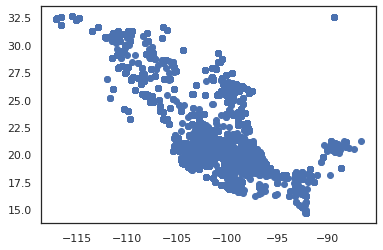

In [90]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df_coordenadas['longitud'], df_coordenadas['latitud'])]
geodata=gpd.GeoDataFrame(df_coordenadas,crs=crs, geometry=geometry)
geodata.plot();



> Podemos ver que sin una imagen de referencia, el gráfico toma la forma de la República Méxicana.



Para tener mejor claridad de en qué estados sucedieron los casos, importamos un archivo tipo `.shp` que será útil para graficar los puntos encima de la imágen de referencia.

In [91]:
mexico_shapefile = gpd.read_file('/vsicurl/https://github.com/MinervaNunez/Proyecto-_Fase3_Python/raw/main/Mexico_States.shp')

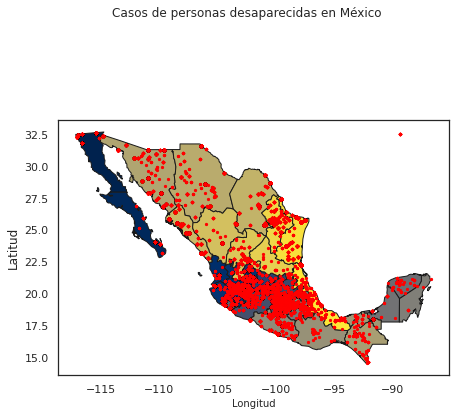

In [92]:
fig, ax = plt.subplots(figsize=(7,7))

mexico_shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1,cmap="cividis")


geodata.plot(ax=ax, color='red', markersize=5);



fig.suptitle('Casos de personas desaparecidas en México', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium');



> Podemos ver que muchos de los casos suceden al centro y noreste del país.



# Lectura de Datos

Una vez que importamos los módulos necesarios para nuestro análisis, procedemos a leer el `DataFrame` que resultó del proyecto del módulo anterior. Este `DataFrame` ya se encuentra limpio, sin embargo, para hacer el análisis sobre el campo de `senas_particulares` de nuestro dataset tendremos que hacer un pulido de los registros en esta columna.

Como se observa de las instrucciones anteriores, nuestra variable `senas_particulares` es apta para realizar un análisis utilizando lo aprendido sobre procesamiento del lenguaje natural con `nltk`.

In [93]:
df['senas_particulares']

0        Tiene Una Cicatriz En La Rodilla Izquierda Por...
1                                          No Especificado
2        Manchas, Parte Superior De Pierna Derecha, Cic...
3        Lunares, A La Altura De La Cinturaforma De Man...
4                                          No Especificado
                               ...                        
35896    Lunar En La Mejilla Y Tatuaje En El Cuello En ...
35897    El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...
35898                                      No Especificado
35899    Tatuaje En El Brazo Izquierdo Con La Imagen De...
35900                                      No Especificado
Name: senas_particulares, Length: 35901, dtype: object

In [94]:
df['senas_particulares']

0        Tiene Una Cicatriz En La Rodilla Izquierda Por...
1                                          No Especificado
2        Manchas, Parte Superior De Pierna Derecha, Cic...
3        Lunares, A La Altura De La Cinturaforma De Man...
4                                          No Especificado
                               ...                        
35896    Lunar En La Mejilla Y Tatuaje En El Cuello En ...
35897    El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...
35898                                      No Especificado
35899    Tatuaje En El Brazo Izquierdo Con La Imagen De...
35900                                      No Especificado
Name: senas_particulares, Length: 35901, dtype: object

# Uso de patrones RegEx para limpiar datos



De las instrucciones anteriores podemos observar que los registros con un valor de 'No Especificado' no nos serán particularmente útiles para estudiar nuestra variable. Es con este motivo que generamos un `DataFrame` sin los registros que poseen este valor como observación.

In [95]:
senas_part_df = df.loc[df['senas_particulares'] !='No Especificado']
senas_part_df

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.10,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.10,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.10,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
7,2011,2011-06-13,01:00:11,2513,Estado De Mexico,Amecameca,Amecameca,"19.128693, -98.764657",Mexicana,Mujer,7,1.15,Robusta,"Manchas, En El Tobilloderecha Causada Porquema...",Ninguno,FGJ - Estado De Mexico
8,2010,2010-04-24,01:00:47,2928,Estado De Mexico,Teoloyucan,Teoloyucan,"19.751582, -99.171598",Mexicana,Hombre,6,1.15,Delgada,"Cicatrices, En La Caravaricela Pocas",Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35892,2018,2018-04-22,11:30:00,8,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Mujer,18,1.52,Delgada,Perforacion En La Lengua Y Mancha Blanca En Me...,Ninguno,FGE - Puebla
35895,2018,2018-04-15,06:30:00,15,Colima,Colima,Colima,"19.242918, -103.709341",Mexicana,Hombre,57,1.59,Robusta,Tiene Una Cicatriz En La Parte Baja De Su Abdo...,Ninguno,PGJ - Colima
35896,2018,2018-04-26,08:00:00,4,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Hombre,22,1.60,Delgada,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35897,2018,2018-01-08,11:00:00,112,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Mujer,27,1.70,Robusta,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima


En tanto que en esta parte del proyecto nos centramos en el estudio de la variable `senas_particulares`, prescindimos de momento del dataframe en favor de trabajar exclusivamente con la columna.

In [96]:
senas_part_series = senas_part_df['senas_particulares']
senas_part_series

0        Tiene Una Cicatriz En La Rodilla Izquierda Por...
2        Manchas, Parte Superior De Pierna Derecha, Cic...
3        Lunares, A La Altura De La Cinturaforma De Man...
7        Manchas, En El Tobilloderecha Causada Porquema...
8                     Cicatrices, En La Caravaricela Pocas
                               ...                        
35892    Perforacion En La Lengua Y Mancha Blanca En Me...
35895    Tiene Una Cicatriz En La Parte Baja De Su Abdo...
35896    Lunar En La Mejilla Y Tatuaje En El Cuello En ...
35897    El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...
35899    Tatuaje En El Brazo Izquierdo Con La Imagen De...
Name: senas_particulares, Length: 17211, dtype: object

Estandarizamos los registros en `senas_part_series` pasando todos los caracteres a minúsculas, quitando los _trailing characters_, y quitando caracteres que no sean letras ni espacios.

In [97]:
# Estandarizando a todo lower case
senas_part_series = senas_part_series.str.lower()

# Quitando los trailing characters
senas_part_series = senas_part_series.str.strip()

# Quitando los \n, \t, \r
#senas_part_series = senas_part_series.str.replace(r'\t+|\n+|\r+', ' ', regex=True)

# Quitando los caracteres que no son letras ni espacios
senas_part_series = senas_part_series.str.replace('[^\w\s]', '', regex=True)

# Quitando comas
#sena_part_series = senas_part_series.str.replace(',', '')

# Como los datos ya estan libres de NAs, no es necesario hacer ese procesamnto

#senas_part_series[senas_part_seriess.str.contains(',')]

senas_part_series

0        tiene una cicatriz en la rodilla izquierda por...
2        manchas parte superior de pierna derecha cicat...
3        lunares a la altura de la cinturaforma de manc...
7        manchas en el tobilloderecha causada porquemad...
8                      cicatrices en la caravaricela pocas
                               ...                        
35892    perforacion en la lengua y mancha blanca en me...
35895    tiene una cicatriz en la parte baja de su abdo...
35896    lunar en la mejilla y tatuaje en el cuello en ...
35897    el ojo izquierdo tiene un enfermedad como tic ...
35899    tatuaje en el brazo izquierdo con la imagen de...
Name: senas_particulares, Length: 17211, dtype: object

# Análisis estadístico de los datos

Nos interesa conocer cuáles son las características más comunes que comparten las personas desaparecidas, por lo que primero tokenizamos las palabras pues es requisito para construir un objeto `FreqDist` y también es esencial para el análisis de contextos.

In [98]:
tokens = senas_part_series.apply(
    nltk.word_tokenize, 
    language='spanish'
)

palabras = tokens.sum()
palabras

['tiene',
 'una',
 'cicatriz',
 'en',
 'la',
 'rodilla',
 'izquierda',
 'por',
 'una',
 'caida',
 'tipo',
 'raspon',
 'manchas',
 'parte',
 'superior',
 'de',
 'pierna',
 'derecha',
 'cicatrices',
 'en',
 'ceja',
 'izquierda',
 'y',
 'una',
 'mas',
 'en',
 'el',
 'lado',
 'izquie',
 'lunares',
 'a',
 'la',
 'altura',
 'de',
 'la',
 'cinturaforma',
 'de',
 'mancha',
 'cicatrices',
 'a',
 'un',
 'lado',
 'ojo',
 'derecho',
 'manchas',
 'en',
 'el',
 'tobilloderecha',
 'causada',
 'porquemadura',
 'de',
 'bicileta',
 'quemaduras',
 'cicatrices',
 'en',
 'la',
 'cej',
 'cicatrices',
 'en',
 'la',
 'caravaricela',
 'pocas',
 'lunares',
 'en',
 'cuello',
 'en',
 'indice',
 'izq',
 'y',
 'arco',
 'del',
 'pie',
 'izquierdo',
 'en',
 'la',
 'pierna',
 'izquierda',
 'ya',
 'que',
 'se',
 'le',
 'puso',
 'una',
 'placa',
 'en',
 'el',
 'femur',
 'con',
 'corte',
 'de',
 'volcan',
 'cicatrices',
 'pestañas',
 'rizadas',
 'en',
 'unos',
 'de',
 'sus',
 'brazos',
 'tiene',
 'un',
 'tatuaje',
 'en',

Ya con nuestra lista de palabras podemos hacer el análisis estadístico de estas.

In [99]:
freq_dist = nltk.FreqDist(palabras)
print(freq_dist)

<FreqDist with 11084 samples and 321469 outcomes>


De lo anterior, podemos observar que contamos con 11084 muestras.
Es importante notar que muchas de estas muestras no toman gran relevancia en el análisis pues son lo que se denominan _stop words_, las cuales no deberían aportar mucho a la semántica.

Como se observa en el resultado de la siguiente instrucción, tan solo en las 50 palabras más comunes se encuentran bastantes _stop words_.

In [100]:
comunes = [itm[0] for itm in freq_dist.most_common()]
comunes[:50]

['en',
 'de',
 'la',
 'el',
 'y',
 'una',
 'cicatriz',
 'un',
 'tiene',
 'con',
 'derecho',
 'tatuaje',
 'izquierdo',
 'del',
 'lado',
 'brazo',
 'lunar',
 'derecha',
 'izquierda',
 'espalda',
 'que',
 'a',
 'forma',
 'su',
 'parte',
 'nombre',
 'mano',
 'los',
 'por',
 'pecho',
 'tatuajes',
 'color',
 'leyenda',
 'dos',
 'pierna',
 'cicatrices',
 'no',
 'ceja',
 'las',
 'como',
 'hombro',
 'centimetros',
 'cuenta',
 'otro',
 'aproximadamente',
 'frente',
 'cara',
 'uno',
 'superior',
 'altura']

Las _stop words_ encontradas en nuestra lista de palabras son las siguientes:

In [101]:
esp_stopw = stopwords.words('spanish')
palabras_stopw = [w for w in comunes if w in esp_stopw]
palabras_stopw[:15]

['en',
 'de',
 'la',
 'el',
 'y',
 'una',
 'un',
 'tiene',
 'con',
 'del',
 'que',
 'a',
 'su',
 'los',
 'por']

Tenemos un total de 131 _stop words_ distintas en nuestro corpus.

In [102]:
len(palabras_stopw)

131

Solo para alimentar la curiosidad, visualizamos la distribución de estas stop words en un histograma. En tanto que estaremos graficando datos de formas análogas, definimos una función `plot_freq_n_comunes` que automatice el proceso.

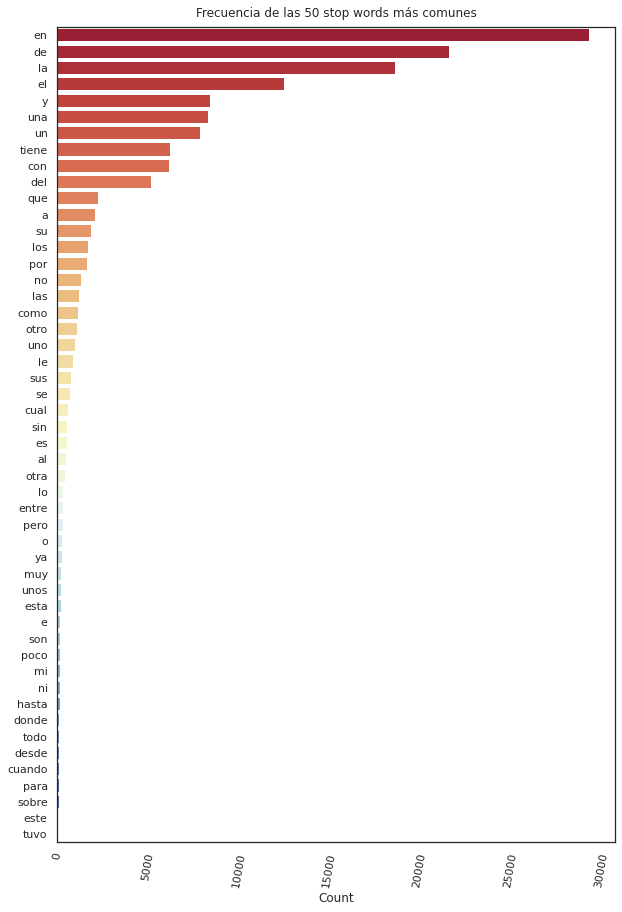

In [103]:
freq_dist_palabras_stopw = [tupl for tupl in freq_dist.most_common() if tupl[0] in esp_stopw]


def plot_freq_n_comunes(data, title=""):
    X = np.array(
        list(
            map(
                lambda x: list(x), data
            )
        )
    )

    fig = plt.figure(figsize=(10,15))
    ax = fig.add_subplot()

    sns.barplot(y=X[:, 0], x=X[:, 1].astype('int'), ax=ax, palette='RdYlBu')
    ax.set_title(title, pad=10)
    ax.set_xlabel('Count')
    ax.tick_params(axis='x', rotation=80)

plot_freq_n_comunes(
    freq_dist_palabras_stopw[0:50],
    "Frecuencia de las 50 stop words más comunes"
)

Ya que exploramos un poco la distribución de las stop words dentro de nuestros datos, procedemos a filtrarlos de nuestra lista de palabras para procesar el texto que realmente nos importa estudiar.

In [104]:
# lista de palabras sin stop words
palabras_no_stopw = [token for token in palabras if token not in esp_stopw]

len(palabras_no_stopw)

171918

En total, sin las stop words contamos con 171918 palabras para analizar.

Contabilizando el número de palabras que nos quedan tras quitar las stop words:

In [106]:
# Quitando las stopwords queda el 50%:

print(f'{(100*len(palabras_no_stopw) / len(palabras)):0.3f}%')

53.479%


Como nos interesa hacer un análisis estadístico de las palabras, creamos un objeto `FreqDist` con esta lista obtenida.

In [107]:
freq_dist_palabras_no_stopw = nltk.FreqDist(palabras_no_stopw)
comunes = freq_dist_palabras_no_stopw.most_common()
comunes[:30]

[('cicatriz', 7859),
 ('derecho', 5968),
 ('tatuaje', 5750),
 ('izquierdo', 5355),
 ('lado', 4311),
 ('brazo', 3837),
 ('lunar', 3173),
 ('derecha', 2945),
 ('izquierda', 2483),
 ('espalda', 2320),
 ('forma', 1998),
 ('parte', 1793),
 ('nombre', 1737),
 ('mano', 1737),
 ('pecho', 1642),
 ('tatuajes', 1626),
 ('color', 1491),
 ('leyenda', 1460),
 ('dos', 1404),
 ('pierna', 1376),
 ('cicatrices', 1332),
 ('ceja', 1283),
 ('hombro', 1170),
 ('centimetros', 1157),
 ('cuenta', 1119),
 ('aproximadamente', 1088),
 ('frente', 1041),
 ('cara', 1016),
 ('superior', 949),
 ('altura', 944)]

Calculamos los porcentajes de aparición de las palabras más frecuentes:

In [108]:
tot = len(palabras_no_stopw)
suma = 0
i = 0

for tpl in comunes[:40]:
    tmp = 100*freq_dist_palabras_no_stopw[tpl[0]]
    suma = suma + (tmp / tot)
    print(
        f'{i}. Porcentaje de aparicion de {tpl[0]}:{(tmp / tot):.3f}%'
    )
    i+=1
print(f'Total acumulado: {suma:.3f}%')


0. Porcentaje de aparicion de cicatriz:4.571%
1. Porcentaje de aparicion de derecho:3.471%
2. Porcentaje de aparicion de tatuaje:3.345%
3. Porcentaje de aparicion de izquierdo:3.115%
4. Porcentaje de aparicion de lado:2.508%
5. Porcentaje de aparicion de brazo:2.232%
6. Porcentaje de aparicion de lunar:1.846%
7. Porcentaje de aparicion de derecha:1.713%
8. Porcentaje de aparicion de izquierda:1.444%
9. Porcentaje de aparicion de espalda:1.349%
10. Porcentaje de aparicion de forma:1.162%
11. Porcentaje de aparicion de parte:1.043%
12. Porcentaje de aparicion de nombre:1.010%
13. Porcentaje de aparicion de mano:1.010%
14. Porcentaje de aparicion de pecho:0.955%
15. Porcentaje de aparicion de tatuajes:0.946%
16. Porcentaje de aparicion de color:0.867%
17. Porcentaje de aparicion de leyenda:0.849%
18. Porcentaje de aparicion de dos:0.817%
19. Porcentaje de aparicion de pierna:0.800%
20. Porcentaje de aparicion de cicatrices:0.775%
21. Porcentaje de aparicion de ceja:0.746%
22. Porcentaje d

De forma gráfica esta distribución se aprecia en la siguiente figura (aunque se encuentre acotada a los primeros 40):

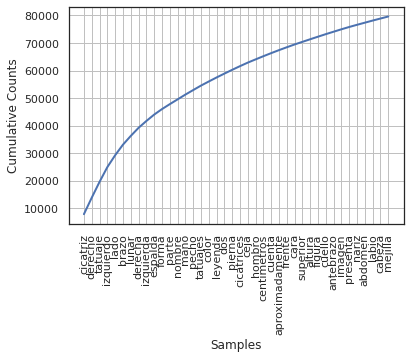

In [109]:
freq_dist_palabras_no_stopw.plot(40,cumulative=True);

Visualizamos los datos de forma gráfica

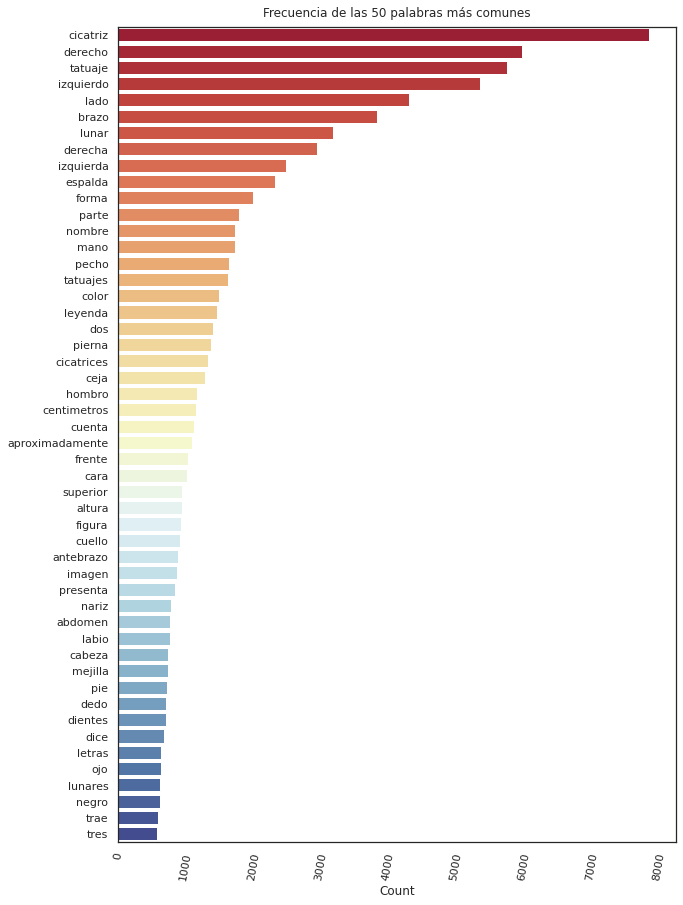

In [110]:
# Frecuencia de las palabras más comunes.

plot_freq_n_comunes(
    freq_dist_palabras_no_stopw.most_common()[0:50],
    "Frecuencia de las 50 palabras más comunes")

Una forma bastante intuitiva de visualizar la distribución es mediante una nube de palabras. Nótese que coincide con las observaciones hechas anteriormente.

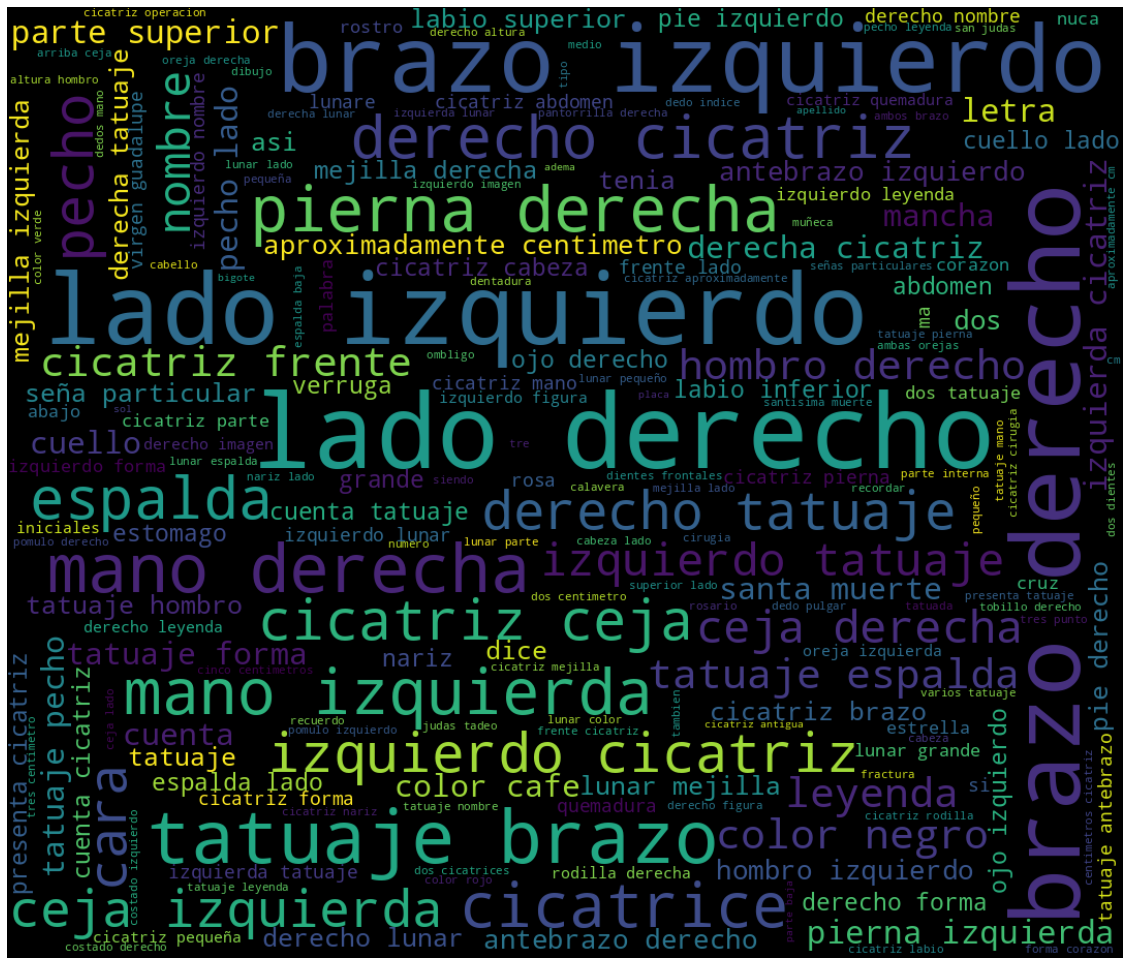

In [111]:
# nube de palabras
palabras_no_outliers = [w for w in palabras_no_stopw if len(w) < 23]
nube = WordCloud(width=1080, height=920, max_font_size=100, background_color='black').generate(' '.join(palabras_no_outliers))

plt.figure(figsize=(20,20))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

Finalmente, podemos graficar la distribución de los datos con un histograma.

<AxesSubplot: ylabel='Count'>

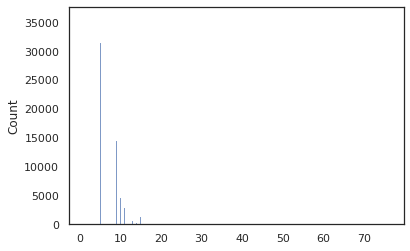

In [112]:
# histograma de la frecuencia de longitudes de palabras y oraciones
# Los outliers no permiten estudiar bien el comportamiento de la distribución

sns.histplot(data=[len(s) for s in palabras_no_stopw])

Podemos investigar cuáles son las palabras que aparecen un 0.001%, es decir aquellas que ocurren sólo una vez. En la siguiente instrucción solo mostramos 50.

In [113]:
print(len(freq_dist_palabras_no_stopw.hapaxes()))
freq_dist_palabras_no_stopw.hapaxes()[:50]

6664


['cinturaforma',
 'tobilloderecha',
 'porquemadura',
 'bicileta',
 'caravaricela',
 'rizadas',
 'sentaderas',
 'rabadulla',
 'andrid',
 'naciente',
 'seja',
 'partede',
 'mantenedor',
 'coyunturas',
 'especificadoa',
 'forna',
 'elva',
 'pzas',
 'mati',
 'ctabique',
 'kgtatuaje',
 'tarahumara',
 'mestiza',
 'acomodado',
 'derechodientes',
 'sagre',
 'elyalma',
 'ubarba',
 'duna',
 'iej',
 'bigoteojos',
 'lono',
 'zafiro',
 'cabrera',
 'quemaron',
 'edmundo',
 'macadentadura',
 'mestizopantalon',
 'cruzado',
 'lunano',
 'pst',
 'vala',
 'redondocicatriz',
 'nedro',
 'palaomas',
 'facturo',
 'ladeandose',
 'pequenas',
 'heridad',
 'lao']

Tenemos un total de 6664 palabras con ocurrencia única. Muchas de estas palabras ocurren una vez por faltas de ortografía.

También hay palabras con un exceso de longitud. Quitando estas palabras podemos mejorar el histograma obtenido antes.

<AxesSubplot: ylabel='Count'>

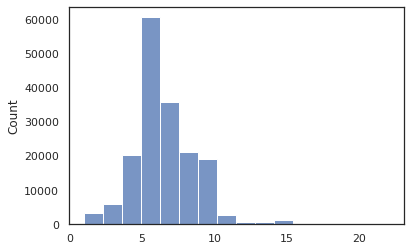

In [114]:
# Quitamos las palabras con más de 23 letas
# De acuerdo con la RAE, la palabra más larga en español tiene 23 letas.

palabras_no_outliers = [w for w in palabras_no_stopw if len(w) < 23]

# graficando el histograma:

sns.histplot(data=[len(s) for s in palabras_no_outliers], bins=16)

# La distribución es aproximadamente normal salvo outliers.

Podemos observar una lista con las 40 palabras más comunes salvo stop words. La más común es cicatriz, seguida de derecho y tatuaje. Será interesante estudiar bajo qué contextos aparecen estas tres palabras. Para esto, generamos un objeto Text que nos permita estudiar justamente esto.

# Exploración de contextos con el objeto Text

Una vez que ya conocemos mejor cuáles son las características más comunes que comparten las personas desaparecidas, procedemos a hacer un análisis de contexto para entender un poco mejor qué otras relaciones poseen estas características con otras, de modo que nos permita caracterizar mejor los valores típicos.

Del análisis estadístico anterior, podemos ver que palabras de interés son:

In [115]:
comunes_contexto = [tpl[0] for tpl in comunes[0:5]]
comunes_contexto

['cicatriz', 'derecho', 'tatuaje', 'izquierdo', 'lado']

Generamos un objeto Text que nos permita estudiar los contextos de interés para obtener información sobre el contexto de nuestras 5 palabras más frecuentes.

In [116]:
text_obj = nltk.Text(palabras)

Investiguemos la riqueza léxica:

In [117]:
# Riqueza lexica

print(f'Porcentaje de riqueza léxica: {100*len(set(text_obj))/len(text_obj):.3f}%')

Porcentaje de riqueza léxica: 3.448%


Por lo tanto, podemos concluir que las descripciones que se encuentran en nuestros registros no son muy ricas.

Obtenemos ademas las colocaciones

In [118]:
text_obj.collocations()

una cicatriz; del lado; lado derecho; lado izquierdo; cuenta con;
brazo derecho; brazo izquierdo; mano derecha; tiene una; santa muerte;
pierna derecha; mano izquierda; seña particular; color negro; que
dice; asi como; color cafe; ceja izquierda; parte superior; ceja
derecha


De las cuales rescatamos bajo qué contextos en común aparecen en particular las palabras _color_ y _cafe_/_negro_

In [119]:
text_obj.common_contexts(['color', 'cafe'])

de_oscuro de_oscura o_tatuaje


In [120]:
text_obj.common_contexts(['color', 'negro'])

con_y con_de de_en y_uno


Analizamos el contexto de cicatriz mediante las funciones `concordance`, y `similar` de las palabras:

* cicatriz 
* derecho, 
* tatuaje, 
* izquierdo, 
* lado

### Contexto de cicatriz

In [121]:
text_obj.concordance(comunes_contexto[0])

Displaying 25 of 7859 matches:
tiene una cicatriz en la rodilla izquierda por una ca
d en el brazo del lado derecho una cicatriz de 5 a 8 cmts a lo largo del brazo
 sexo masculino de emiliano zapata cicatriz en mano derecha tatuajes uno en un
 dos iniciales tatuadas en su piel cicatriz en ceja izquierda sin barba poco b
a imagen de la virgen de guadalupe cicatriz de hernia en una pierna no recuerd
el labio superior del lado derecho cicatriz en el brazo izquierdo en forma de 
o y un lunar en la nalga izquierda cicatriz en ceja izquierda cicatriz lineal 
quierda cicatriz en ceja izquierda cicatriz lineal en pierna derecha cicatriz 
 cicatriz lineal en pierna derecha cicatriz de un centimetro en labio superior
azon padece alzheimer presenta una cicatriz en la sien del lado izquierdo no t
o tiene el ojo izquierdo tiene una cicatriz en la ceja derecha tiene una cicat
atriz en la ceja derecha tiene una cicatriz en la muñeca izquierda no tiene do
senta un lunar en pomulo izquierdo cicatriz en

Podemos observar que el 4-grama que comienza por cicatriz suele incluir la ubicación de dicha cicatriz. Aparentemente el texto detrás de cicatriz no provee mayor información sobre esta.

También, cicatriz suele estar en el mismo contexto que tatuaje, tatuajes, lunar, lunares, perforación, mancha y demás, como se observa en el resultado de la siguiente instrucción.

In [122]:
text_obj.similar(comunes_contexto[0])

tatuaje y lunar cicatrices tatuajes perforacion tiene otro lunares uno
mancha una de en manchas verruga grande operacion arriba pecas


### Contexto de derecho

In [123]:
text_obj.concordance(comunes_contexto[1])

Displaying 25 of 5968 matches:
 de mancha cicatrices a un lado ojo derecho manchas en el tobilloderecha causad
e dos tatuajes en el pecho del lado derecho el nombre de miriam y del lado izqu
 de juan david en el brazo del lado derecho una cicatriz de 5 a 8 cmts a lo lar
rices en la cabeza tatuaje en brazo derecho con la figura de una persona del se
 del cuello y un grano en el hombro derecho pecas en la cara tiene un lunar arr
 arriba del labio superior del lado derecho cicatriz en el brazo izquierdo en f
 de un centimetro en labio superior derecho acne en la cara tatuaje en el anteb
erdo cicatriz en la frente del lado derecho a la altura de la ceja cicatriz en 
bligo cicatriz en la cabeza de lado derecho cicatriz en ceja derecha y lunar en
 en mejilla derecha renguea del pie derecho tiene un piercing en el obligo una 
 le falta un pedazo del dedo indice derecho tiene una cicatriz en la parte inte
ede arriba tatuaje dragòn en hombro derecho tatuajes en forma de alacran en la 
erdo tien

A diferencia de cicatriz, derecho si viene acompañada de más información relevante de ambos lados.

Además, esta palabra como es de esperarse aparece en los contextos semejantes a la palabra _izquierda_ y sus variaciones, al igual que partes del cuerpo.

In [124]:
text_obj.similar(comunes_contexto[1])

izquierdo y tiene de izquierda tatuaje en cicatriz con derecha izq
otro lunar un trae una superior cuello pecho abdomen


### Contexto de tatuaje

In [125]:
text_obj.concordance(comunes_contexto[2])

Displaying 25 of 5750 matches:
adas en unos de sus brazos tiene un tatuaje en unos de sus brazos las cuales so
 a lo largo del brazo bigote escaso tatuaje en forma de cruz en el brazo izquie
rdo y varias ciatrices en la cabeza tatuaje en brazo derecho con la figura de u
erda sin barba poco bigote tiene un tatuaje en el cuello del lado izquierdo con
erdo con la figura de un alacran un tatuaje con la figura de un payaso en una d
rostro como paño lunar en el menton tatuaje con la leyenda andrid y la imagen d
io superior derecho acne en la cara tatuaje en el antebrazo izquierdo tatuaje e
a tatuaje en el antebrazo izquierdo tatuaje en la espalda herida en el dedo pul
iz en seja izquierda señas vicibles tatuaje en una mano tiene dentadura nueva e
entadura nueva en la partede arriba tatuaje dragòn en hombro derecho tatuajes e
izquierda tiene dificultad para ver tatuaje en el cuello con el nombre isabel p
ciones de largo hasta media espalda tatuaje en el brazo derecho con la leyenda 
rosa en e

La palabra tatuaje es un poco más volatil, en tanto que en muchos contextos viene acompañada de una breve descripción de este, en otros viene acompañada de su posición en el cuerpo, y otras ocasiones viene sola.

Las palabras que aparecen en contextos similares a _tatuaje_ son las que se observan como resultado de la siguiente celda. Obsérvese que tatuaje se encuentra en contextos semejantes a otros buenos distintivos de personas como lo son lunares, manchas y cicatrices.

In [126]:
text_obj.similar(comunes_contexto[2])

cicatriz y lunar tatuajes cicatrices otro lunares uno perforacion
tiene cuenta una manchas en mancha izquierdo derecho grande como de


### Contexto de izquierdo

In [127]:
text_obj.concordance(comunes_contexto[3])

Displaying 25 of 5355 matches:
uello en indice izq y arco del pie izquierdo en la pierna izquierda ya que se l
cho el nombre de miriam y del lado izquierdo el nombre de juan david en el braz
tuaje en forma de cruz en el brazo izquierdo y varias ciatrices en la cabeza ta
e un tatuaje en el cuello del lado izquierdo con la figura de un alacran un tat
 lado derecho cicatriz en el brazo izquierdo en forma de u cerca del codo y un 
en la cara tatuaje en el antebrazo izquierdo tatuaje en la espalda herida en el
a espalda herida en el dedo pulgar izquierdo tiene lunar en el cuello tiene el 
a una cicatriz en la sien del lado izquierdo no tiene el ojo izquierdo tiene un
del lado izquierdo no tiene el ojo izquierdo tiene una cicatriz en la ceja dere
miriam presenta un lunar en pomulo izquierdo cicatriz en la frente del lado der
quierda lunar en el menton de lado izquierdo y otra en el pecho de 10 cm aprox 
na calavera que dice beto en brazo izquierdo un dragon usa bigote recortado tie
triz en l

Al igual que la palabra _derecho_, la palabra _izquierdo_ viene acompañada de alguna seña característica de la persona extraviada. Es de esperarse que esta palabra aparezca en contextos similares a _derecho_, _tatuaje_ y _cicatriz_ o alguna parte del cuerpo.

In [128]:
text_obj.similar(comunes_contexto[3])

derecho y tiene de tatuaje en cicatriz izquierda con izq trae otro una
un derecha cuello lunar pecho estomago izquiero


### Contexto de lado

In [129]:
text_obj.concordance(comunes_contexto[4])

Displaying 25 of 4311 matches:
es en ceja izquierda y una mas en el lado izquie lunares a la altura de la cin
nturaforma de mancha cicatrices a un lado ojo derecho manchas en el tobilloder
a tiene dos tatuajes en el pecho del lado derecho el nombre de miriam y del la
do derecho el nombre de miriam y del lado izquierdo el nombre de juan david en
nombre de juan david en el brazo del lado derecho una cicatriz de 5 a 8 cmts a
te tiene un tatuaje en el cuello del lado izquierdo con la figura de un alacra
ernia en una pierna no recuerdan que lado tiene un lunar atras del cuello y un
 lunar arriba del labio superior del lado derecho cicatriz en el brazo izquier
presenta una cicatriz en la sien del lado izquierdo no tiene el ojo izquierdo 
 izquierdo cicatriz en la frente del lado derecho a la altura de la ceja cicat
reja izquierda lunar en el menton de lado izquierdo y otra en el pecho de 10 c
del ombligo cicatriz en la cabeza de lado derecho cicatriz en ceja derecha y l
na cicatriz en la reg

Notemos que lado siempre aparece en un bigrama junto con izquierdo o derecho como es de esperarse. Esto lo podemos comprobar con los contextos comunes.

In [130]:
text_obj.common_contexts([comunes_contexto[3], 'izquierdo', 'derecho'])

brazo_con lado_de lado_tiene brazo_tiene brazo_en lado_cicatriz lado_y
lado_con lado_en lado_del brazo_y brazo_de lado_tatuaje brazo_un
lado_una antebrazo_con brazo_una brazo_la brazo_cicatriz brazo_a


In [131]:
text_obj.similar(comunes_contexto[3])

derecho y tiene de tatuaje en cicatriz izquierda con izq trae otro una
un derecha cuello lunar pecho estomago izquiero


# Estudio de n-gramas

Tras estudiar de forma individual a las palabras en la sección anterior, procedemos a estudiarlas en conjuntos de 2 y 3 palabras consecutivas.

Obtenemos los bigramas más comunes y su frecuencia

In [132]:
# bigramas más comunes y su frecuencia

freq_dist_bigramas = nltk.FreqDist(list(nltk.bigrams(text_obj)))
freq_dist_bigramas

FreqDist({('en', 'la'): 9034, ('en', 'el'): 8789, ('cicatriz', 'en'): 4747, ('de', 'la'): 3855, ('tatuaje', 'en'): 3652, ('una', 'cicatriz'): 2853, ('el', 'brazo'): 2150, ('con', 'la'): 2053, ('un', 'tatuaje'): 2004, ('del', 'lado'): 1971, ...})

Debido a que en las anteriores instrucciones consideramos también a las stop words para el análisis, y estas no agregan mucho a la semántica, volvemos a realizar el análisis de frecuencias pero ahora con el conjunto de palabras sin stop words.

In [133]:
# bigramas sin las stopw y su frecuencia.

freq_dist_bigramas = nltk.FreqDist(
    list(
        nltk.bigrams(
            nltk.Text(palabras_no_stopw)
        )
    )
)

freq_dist_bigramas

FreqDist({('lado', 'derecho'): 1918, ('lado', 'izquierdo'): 1718, ('brazo', 'derecho'): 1619, ('brazo', 'izquierdo'): 1510, ('tatuaje', 'brazo'): 865, ('mano', 'derecha'): 747, ('pierna', 'derecha'): 658, ('mano', 'izquierda'): 657, ('derecho', 'cicatriz'): 588, ('izquierdo', 'cicatriz'): 512, ...})

En el resultado de la línea anterior corraboramos nuestra observación hecha antes sobre los contextos en los que aparecían las cinco palabras más comunes.

Ahora graficamos la distribución de los bigramas.

/tmp/ipykernel_59456/2726476188.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(


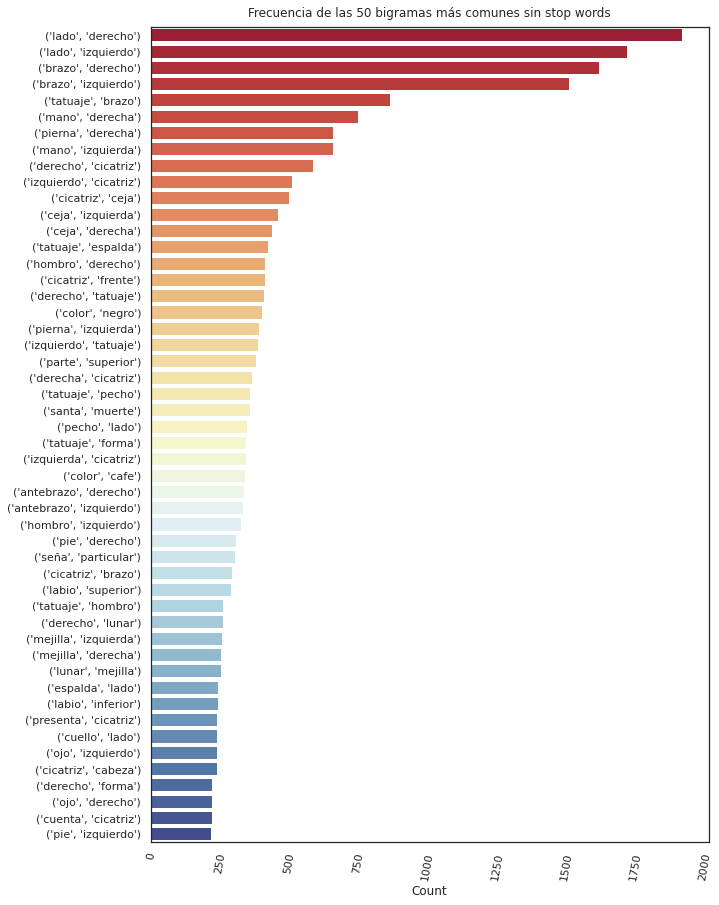

In [134]:
plot_freq_n_comunes(freq_dist_bigramas.most_common(50), 'Frecuencia de las 50 bigramas más comunes sin stop words');

Con bigramas no obtenemos mucha información sobre rasgos caracteristicos que presentan los registros. Es por este motivo que consideramos trigramas.

In [135]:
# trigramas sin las stopw y su frecuencia.

freq_dist_trigramas = nltk.FreqDist(
    list(
        ngrams(
            nltk.Text(palabras_no_stopw), 3
        )
    )
)

freq_dist_trigramas

FreqDist({('tatuaje', 'brazo', 'derecho'): 422, ('tatuaje', 'brazo', 'izquierdo'): 339, ('lado', 'derecho', 'cicatriz'): 249, ('cicatriz', 'ceja', 'izquierda'): 207, ('pecho', 'lado', 'izquierdo'): 206, ('lado', 'izquierdo', 'cicatriz'): 191, ('cicatriz', 'ceja', 'derecha'): 188, ('tatuaje', 'hombro', 'derecho'): 131, ('lado', 'derecho', 'tatuaje'): 128, ('cicatriz', 'brazo', 'izquierdo'): 126, ...})

/tmp/ipykernel_59456/2726476188.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(


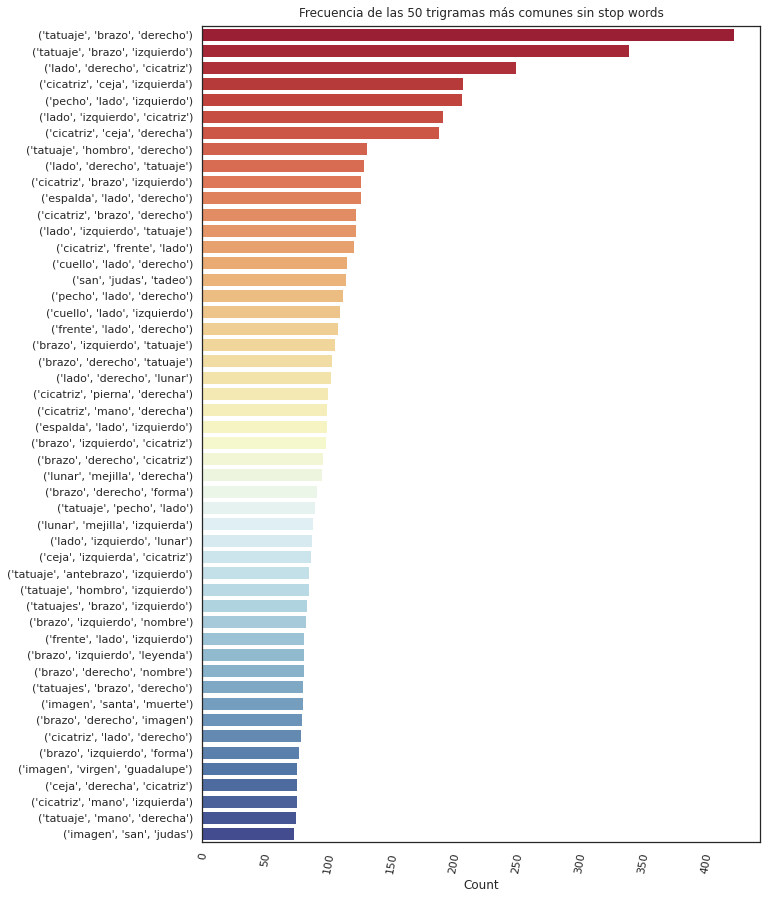

In [136]:
plot_freq_n_comunes(freq_dist_trigramas.most_common(50), 'Frecuencia de las 50 trigramas más comunes sin stop words');

Claramente ahora obtenemos información más útil no solo sobre un rasgo característico del registro sino que también su posición.

# Análisis de sentimientos

En tanto que nuestros datos son neutros en sentimiento al ser parte de una descripción, no hay nada que reportar en eso.

# Conclusiones preliminares

Podemos concluir a partir del análisis realizado:

* La riqueza léxica es baja, y por lo tanto las descripciones resultan un poco pobres. Muy probablemente esto se deba a que dichas descripciones deben ser concisas y breves.

* El rasgo característico más frecuente fue cicatriz, seguida de tatuaje. Por lo tanto, muchos de los registros presentan cicatrices, tatuajes o ambos. De acuerdo con nuestro análisis de trigramas, los tatuajes suelen encontrarse en los brazos; y la cicatriz está presente con mayor fecuencia en la ceja.

* Mediante procesamiento de los trigramas podemos obtener la posición de los rasgos particulares.


# Machine Learning, Clasificación Supervisada

## Introducción a Machine Learning: Clasificación No Supervisada y Supervisada

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Identificamos que en el conjunto de datos existe una variable dicotómica: sexo
Vamos a buscar un modelo para predecir el género (sexo) de la persona a partir de variables independientes como entidad, edad, estatura y complexión.

Sustituiremos los valores de las variables categóricas por números de un catálogo generado con los valores únicos de cada variable


In [138]:
# Identificar los valores posibles de la variable 'sexo'
df['sexo'].unique()

array(['Mujer', 'Hombre'], dtype=object)

In [139]:
# Sustituir los valores dicotómicos Mujer, Hombre por un valor numérico 0 y 1 respectivamente
df['sexo'] = df['sexo'].apply(lambda x: 0 if x == 'Mujer' else 1)
df.head()

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,0,7,1.1,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,0,4,1.1,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,1,6,1.1,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,1,10,1.1,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,1,4,1.1,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico


In [140]:
# Obtener un listado de los valores únicos para la columna complexión
complexiones = df['complexion'].unique()
complexiones

array(['Delgada', 'Robusta', 'Mediana', 'Obesa', 'No Especificado'],
      dtype=object)

In [141]:
# Generar una secuencia de números con la misma cantidad de valores que el listado, un diccionario con esa secuencia y los valores únicos de la complexión 
indices = list(range(1, len(complexiones)+1))
complexiones_dic = dict(zip(indices, complexiones))
complexiones_dic

{1: 'Delgada', 2: 'Robusta', 3: 'Mediana', 4: 'Obesa', 5: 'No Especificado'}

In [142]:
# Reemplazar las etiquetas de complexión por los valores númericos del diccionario (el índice)
df['complexion'] = df['complexion'].replace(complexiones, indices)
df['complexion']

0        1
1        1
2        1
3        1
4        1
        ..
35896    1
35897    2
35898    3
35899    2
35900    1
Name: complexion, Length: 35901, dtype: int64

In [143]:
# Obtener un listado de los valores únicos para la columna entidad
entidades = df['entidad'].unique()
entidades

# Generar una secuencia de números con la misma cantidad de valores que el listado, un diccionario con esa secuencia y los valores únicos de la entidad 
indices = list(range(1, len(entidades)+1))
entidades_dic = dict(zip(indices, entidades))
entidades_dic

# Reemplazar las etiquetas de entidad por los valores númericos del diccionario (el índice)
df['entidad'] = df['entidad'].replace(entidades, indices)
df['entidad']

0         1
1         2
2         2
3         2
4         2
         ..
35896    19
35897     5
35898    19
35899     5
35900    12
Name: entidad, Length: 35901, dtype: int64

In [144]:
# Seleccionar la columna de sexo y almacenarla en la variable independiente 'y'
y = df['sexo']

# Eliminar las columnas que no son de interés para entrenar al modelo
X = df.drop(columns=['anio', 'fecha', 'hora', 'dias_desaparecido', 'municipio', 'localidad', 'coordenadas', 'nacionalidad', 'sexo', 'senas_particulares', 'discapacidad', 'dependecia_origen'])

In [145]:
# Entrenar un modelo de Regresión Logística para clasificar sexo de la persona a partir de los valores entidad, edad, estatura y complexión 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [146]:
logreg = LogisticRegression(max_iter=10000)

In [147]:
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [148]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(max_iter=10000)

In [149]:
# Realizar predicciones utilizando el dataset de prueba:
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [150]:
# Calcular la exactitud del modelo utilizando el método score de LogisticRegression que calcula la exactitud promedio (mean accuracy).
# El valor de exactitud toma valores del intervalo entre 0 y 1, con 1 siendo la 'exactitud perfecta'.
logreg.score(X_test, y_test)

0.7550830934917835

Se calculará una matriz de confusión para el modelo generado



In [151]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import numpy as np

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 435, 2399],
       [ 239, 7698]])

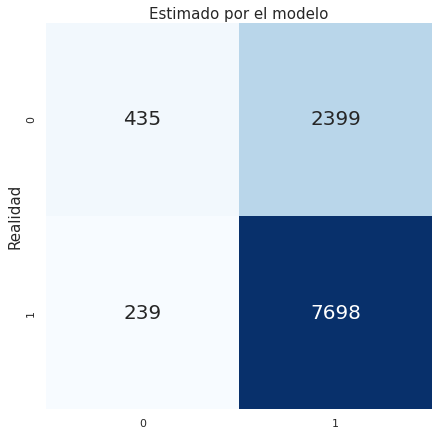

In [152]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Cáculo de las 4 medidas de evaluación del modelo: 
*   Precisión
*   Exactitud
*   Sensibilidad
*   Especificidad

In [153]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.7624046746558384
Exactitud: 0.7550830934917835
Sensibilidad: 0.9698878669522489
Especificidad: 0.15349329569513057
